# Project Summary

This file lists the machine learning codes used for the Gaia GNN project.

## Dependency Check

In [1]:
# conda env: yttest2

# %config InlineBackend.figure_format = 'retina'
%load_ext version_information
import time
now = time.strftime("%Y-%m-%d %H:%M:%S (GMT%z)")
print(f"This notebook was generated at {now} ")

vv = %version_information numpy, scipy, matplotlib, yt, pandas, torch, torch_geometric, h5py, seaborn, sklearn, umap, version_information
for i, pkg in enumerate(vv.packages):
    print(f"{i} {pkg[0]:10s} {pkg[1]:s}")

This notebook was generated at 2024-02-06 15:00:43 (GMT+0900) 


/home/dhhyun/anaconda3/envs/yttest2/lib/python3.9/_collections_abc.py:769: MatplotlibDeprecationWarning: The global colormaps dictionary is no longer considered public API.
  self[key]
/home/dhhyun/anaconda3/envs/yttest2/lib/python3.9/site-packages/torch_geometric/typing.py:47: UserWarning: An issue occurred while importing 'pyg-lib'. Disabling its usage. Stacktrace: /home/dhhyun/anaconda3/envs/yttest2/lib/python3.9/site-packages/libpyg.so: undefined symbol: _ZNK5torch8autograd4Node4nameEv
  warnings.warn(f"An issue occurred while importing 'pyg-lib'. "
/home/dhhyun/anaconda3/envs/yttest2/lib/python3.9/site-packages/torch_geometric/typing.py:63: UserWarning: An issue occurred while importing 'torch-scatter'. Disabling its usage. Stacktrace: /home/dhhyun/anaconda3/envs/yttest2/lib/python3.9/site-packages/torch_scatter/_version_cuda.so: undefined symbol: _ZN5torch3jit17parseSchemaOrNameERKSs
  warnings.warn(f"An issue occurred while importing 'torch-scatter'. "
/home/dhhyun/anaconda3/env

0 Python     3.9.7 64bit [GCC 7.5.0]
1 IPython    8.8.0
2 OS         Linux 3.10.0 862.3.3.el7.x86_64 x86_64 with glibc2.17
3 numpy      1.23.5
4 scipy      1.10.0
5 matplotlib 3.3.4
6 yt         3.6.1
7 pandas     1.4.4
8 torch      1.12.1
9 torch_geometric 2.4.0
10 h5py       3.8.0
11 seaborn    0.12.2
12 sklearn    1.0.2
13 umap       0.5.3
14 version_information 1.0.4


Beware that on Happiness, unlike Hercules which was used only for testing purposes, pytorch version is 2.0.0 and CUDA 11.8.

Some of the errors present in Hercules, especially the one regarding NeighborLoader, do not persist in Happiness, possibly due to the installation of a different version of PyG that supports GPU.

## Importing Packages

In [5]:
import os
from time import time
from tqdm import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial.transform import Rotation as R
from sklearn.preprocessing import MinMaxScaler

import h5py
import yt

import torch
from torch_geometric.data import Data
# from torch_geometric.datasets import TUDataset
import torch.nn.functional as F
# from torch_geometric.nn import GCNConv

Please ignore importing some packages if they occur errors, as not all of them are required to run all cells.

## FIRE2 Snapshot

### Basic Handling of the Snapshot

In [6]:
ds = yt.load('/data1/shared/FIRE2/m12f_res7100/snapdir_600/snapshot_600.0.hdf5')

yt : [INFO     ] 2024-02-14 13:59:16,032 Calculating time from 1.000e+00 to be 4.355e+17 seconds
yt : [INFO     ] 2024-02-14 13:59:16,048 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2024-02-14 13:59:16,082 Parameters: current_time              = 4.3545571088051386e+17 s
yt : [INFO     ] 2024-02-14 13:59:16,083 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2024-02-14 13:59:16,085 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2024-02-14 13:59:16,086 Parameters: domain_right_edge         = [60000. 60000. 60000.]
yt : [INFO     ] 2024-02-14 13:59:16,087 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2024-02-14 13:59:16,088 Parameters: current_redshift          = 0.0
yt : [INFO     ] 2024-02-14 13:59:16,089 Parameters: omega_lambda              = 0.728
yt : [INFO     ] 2024-02-14 13:59:16,090 Parameters: omega_matter              = 0.272
yt : [INFO     ] 2024-02-14 13:59:16,091 Parameters: omega_radiation           = 0.

In [8]:
ds.field_list

[('PartType0', 'Coordinates'),
 ('PartType0', 'Density'),
 ('PartType0', 'ElectronAbundance'),
 ('PartType0', 'InternalEnergy'),
 ('PartType0', 'Masses'),
 ('PartType0', 'Metallicity_00'),
 ('PartType0', 'Metallicity_01'),
 ('PartType0', 'Metallicity_02'),
 ('PartType0', 'Metallicity_03'),
 ('PartType0', 'Metallicity_04'),
 ('PartType0', 'Metallicity_05'),
 ('PartType0', 'Metallicity_06'),
 ('PartType0', 'Metallicity_07'),
 ('PartType0', 'Metallicity_08'),
 ('PartType0', 'Metallicity_09'),
 ('PartType0', 'Metallicity_10'),
 ('PartType0', 'NeutralHydrogenAbundance'),
 ('PartType0', 'ParticleChildIDsNumber'),
 ('PartType0', 'ParticleIDGenerationNumber'),
 ('PartType0', 'ParticleIDs'),
 ('PartType0', 'Potential'),
 ('PartType0', 'SmoothingLength'),
 ('PartType0', 'StarFormationRate'),
 ('PartType0', 'Velocities'),
 ('PartType1', 'Coordinates'),
 ('PartType1', 'Masses'),
 ('PartType1', 'ParticleChildIDsNumber'),
 ('PartType1', 'ParticleIDGenerationNumber'),
 ('PartType1', 'ParticleIDs'),
 

In [9]:
ds.derived_field_list

[('PartType0', 'C_metallicity'),
 ('PartType0', 'C_nuclei_density'),
 ('PartType0', 'C_nuclei_mass_density'),
 ('PartType0', 'Ca_metallicity'),
 ('PartType0', 'Ca_nuclei_density'),
 ('PartType0', 'Ca_nuclei_mass_density'),
 ('PartType0', 'Coordinates'),
 ('PartType0', 'Density'),
 ('PartType0', 'ElectronAbundance'),
 ('PartType0', 'Fe_metallicity'),
 ('PartType0', 'Fe_nuclei_density'),
 ('PartType0', 'Fe_nuclei_mass_density'),
 ('PartType0', 'H_density'),
 ('PartType0', 'H_fraction'),
 ('PartType0', 'H_mass'),
 ('PartType0', 'H_nuclei_density'),
 ('PartType0', 'H_number_density'),
 ('PartType0', 'H_p0_density'),
 ('PartType0', 'H_p0_fraction'),
 ('PartType0', 'H_p0_mass'),
 ('PartType0', 'H_p0_number_density'),
 ('PartType0', 'H_p1_density'),
 ('PartType0', 'H_p1_fraction'),
 ('PartType0', 'H_p1_mass'),
 ('PartType0', 'H_p1_number_density'),
 ('PartType0', 'He_metallicity'),
 ('PartType0', 'He_nuclei_density'),
 ('PartType0', 'He_nuclei_mass_density'),
 ('PartType0', 'InternalEnergy'),

In [10]:
ds.domain_width.in_units("Mpc")

YTArray([85.47008547, 85.47008547, 85.47008547]) Mpc

In [14]:
print(ds.particle_types)
print(ds.particle_types_raw)
print(ds.particle_type_counts)

('PartType2', 'PartType4', 'PartType1', 'PartType0', 'all')
('PartType2', 'PartType4', 'PartType1', 'PartType0')
{'PartType0': 80307825, 'PartType1': 96239056, 'PartType2': 7591203, 'PartType3': 0, 'PartType4': 16066489, 'PartType5': 0}


In [34]:
ad = ds.all_data()
ad

YTRegion (snapshot_600): , center=[1.31866563e+26 1.31866563e+26 1.31866563e+26] cm, left_edge=[0. 0. 0.] cm, right_edge=[2.63733127e+26 2.63733127e+26 2.63733127e+26] cm

In [15]:
dir(ad.quantities)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'angular_momentum_vector',
 'bulk_velocity',
 'center_of_mass',
 'data_source',
 'extrema',
 'keys',
 'max_location',
 'min_location',
 'sample_at_max_field_values',
 'sample_at_min_field_values',
 'spin_parameter',
 'total_mass',
 'total_quantity',
 'weighted_average_quantity',
 'weighted_variance']

yt : [INFO     ] 2023-02-21 00:42:30,704 xlim = 0.000000 60000.000000
yt : [INFO     ] 2023-02-21 00:42:30,706 ylim = 0.000000 60000.000000
yt : [INFO     ] 2023-02-21 00:42:30,707 xlim = 0.000000 60000.000000
yt : [INFO     ] 2023-02-21 00:42:30,708 ylim = 0.000000 60000.000000
yt : [INFO     ] 2023-02-21 00:42:30,709 Splatting (('PartType0', 'particle_mass')) onto a 800 by 800 mesh
/home/dhhyun/anaconda3/envs/yttest2/lib/python3.9/_collections_abc.py:941: MatplotlibDeprecationWarning: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  self[key] = other[key]
/home/dhhyun/anaconda3/envs/yttest2/lib/python3.9/_collections_abc.py:941: MatplotlibDeprecationWarning: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
  self[key] = other[key]
/home/dhhyun/anaconda3/envs/yttest2/lib/python3.9/_collections_abc.py:


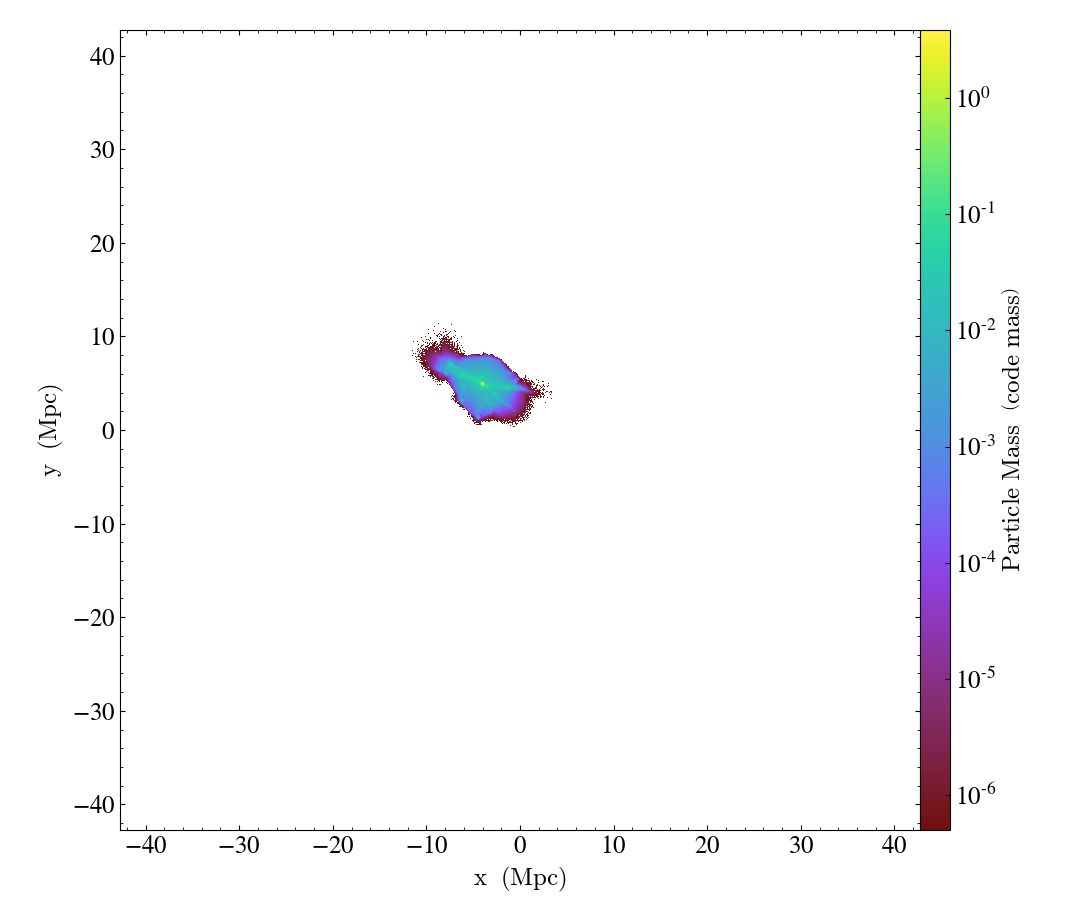

In [42]:
p = yt.ParticlePlot(ds, ('PartType0', 'particle_position_x'), ('PartType0', 'particle_position_y'), ('PartType0', 'particle_mass'))
# p.set_axes_unit("kpc")
# p.set_unit(("all", "particle_mass"), "Msun")
# p.set_width(500, "kpc")
p.show()

In [35]:
coord = ad["PartType4", "Coordinates"]
coord

YTArray([[27138.9190463 , 33484.54843335, 32859.38510102],
         [27139.68341175, 33484.36698365, 32860.1708463 ],
         [27139.32048094, 33484.87363795, 32860.16528778],
         ...,
         [27130.24813227, 33413.15104813, 32921.08462193],
         [27130.87730305, 33413.79672934, 32921.8113876 ],
         [27126.80919159, 33413.41058775, 32921.12521402]]) code_length

In [37]:
vel = ad["PartType4", "Velocities"]
vel

YTArray([[-258.81375122,  244.2427063 ,    1.13115764],
         [-261.4598999 ,  245.0866394 ,   15.8729763 ],
         [-248.07089233,  255.9813385 ,   -8.73585701],
         ...,
         [-223.64694214,  153.38931274,  134.57878113],
         [-143.25788879,  166.79263306,   63.37017441],
         [-116.77761841,  194.02253723,  107.46369934]]) code_velocity

In [49]:
m_star = ad["PartType4", 'Masses']
m_star

YTArray([3.61676769e-07, 3.85887290e-07, 3.30019020e-07, ...,
         3.33533535e-07, 3.27745482e-07, 3.40157669e-07]) code_mass

In [47]:
com = ad.quantities.center_of_mass()
com

YTArray([1.18973322e+26, 1.47582099e+26, 1.44755011e+26]) cm

In [48]:
com.to('Mpc')

YTArray([38.55662776, 47.82810106, 46.91190418]) Mpc

In [17]:
density = ad["PartType0", "density"]
wdens = np.where(density == np.max(density))
coordinates = ad["PartType0", "Coordinates"]
center = coordinates[wdens][0]
print("center = ", center)

center =  [27181.58592799 33457.12049821 32861.94644675] code_length


In [43]:
center.to('Mpc')

YTArray([38.72020787, 47.65971581, 46.81188953]) Mpc

In [44]:
new_box_size = ds.quan(2*100, "kpc")

left_edge = center - new_box_size / 2
right_edge = center + new_box_size / 2

print(new_box_size.in_units("Mpc"))
print(left_edge.in_units("Mpc"))
print(right_edge.in_units("Mpc"))

0.2 Mpc
[38.62020787 47.55971581 46.71188953] Mpc
[38.82020787 47.75971581 46.91188953] Mpc


In [45]:
box = ds.region(center, left_edge, right_edge)#, fields=None, ds=None, field_parameters=None, data_source=None)
# sp = ds.sphere(ds.domain_center, (10, "Mpc"))

yt : [INFO     ] 2023-02-21 00:53:38,745 Projection completed
yt : [INFO     ] 2023-02-21 00:53:38,750 xlim = 33386.920498 33527.320498
yt : [INFO     ] 2023-02-21 00:53:38,751 ylim = 32791.746447 32932.146447
yt : [INFO     ] 2023-02-21 00:53:38,752 xlim = 33386.920498 33527.320498
yt : [INFO     ] 2023-02-21 00:53:38,753 ylim = 32791.746447 32932.146447
yt : [INFO     ] 2023-02-21 00:53:38,755 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800
/home/dhhyun/anaconda3/envs/yttest2/lib/python3.9/_collections_abc.py:941: MatplotlibDeprecationWarning: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  self[key] = other[key]
/home/dhhyun/anaconda3/envs/yttest2/lib/python3.9/_collections_abc.py:941: MatplotlibDeprecationWarning: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
  self[key] = o


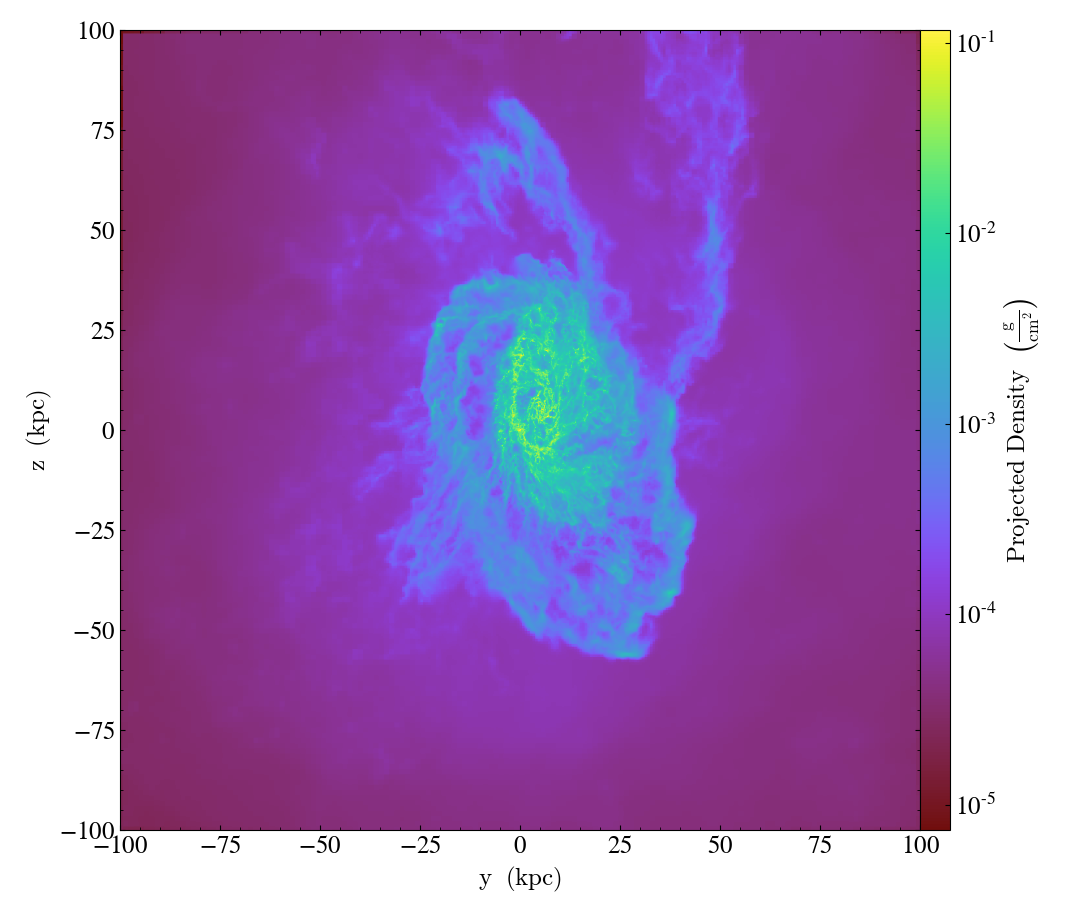

In [46]:
p = yt.ProjectionPlot(ds, "x", ("gas", "density"), center=center, width=new_box_size, data_source=box)
# yt.ParticlePlot(sp3, ('PartType4', 'particle_position_x'), ('PartType4', 'particle_position_y'), data_source=sp3)
p.show()

yt : [INFO     ] 2023-02-21 09:45:32,533 xlim = 27111.385928 27251.785928
yt : [INFO     ] 2023-02-21 09:45:32,535 ylim = 33386.920498 33527.320498
yt : [INFO     ] 2023-02-21 09:45:32,537 xlim = 27111.385928 27251.785928
yt : [INFO     ] 2023-02-21 09:45:32,538 ylim = 33386.920498 33527.320498
yt : [INFO     ] 2023-02-21 09:45:32,539 Splatting (('PartType4', 'particle_mass')) onto a 800 by 800 mesh
/home/dhhyun/anaconda3/envs/yttest2/lib/python3.9/_collections_abc.py:941: MatplotlibDeprecationWarning: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  self[key] = other[key]
/home/dhhyun/anaconda3/envs/yttest2/lib/python3.9/_collections_abc.py:941: MatplotlibDeprecationWarning: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
  self[key] = other[key]
/home/dhhyun/anaconda3/envs/yttest2/lib/python3.9/_col


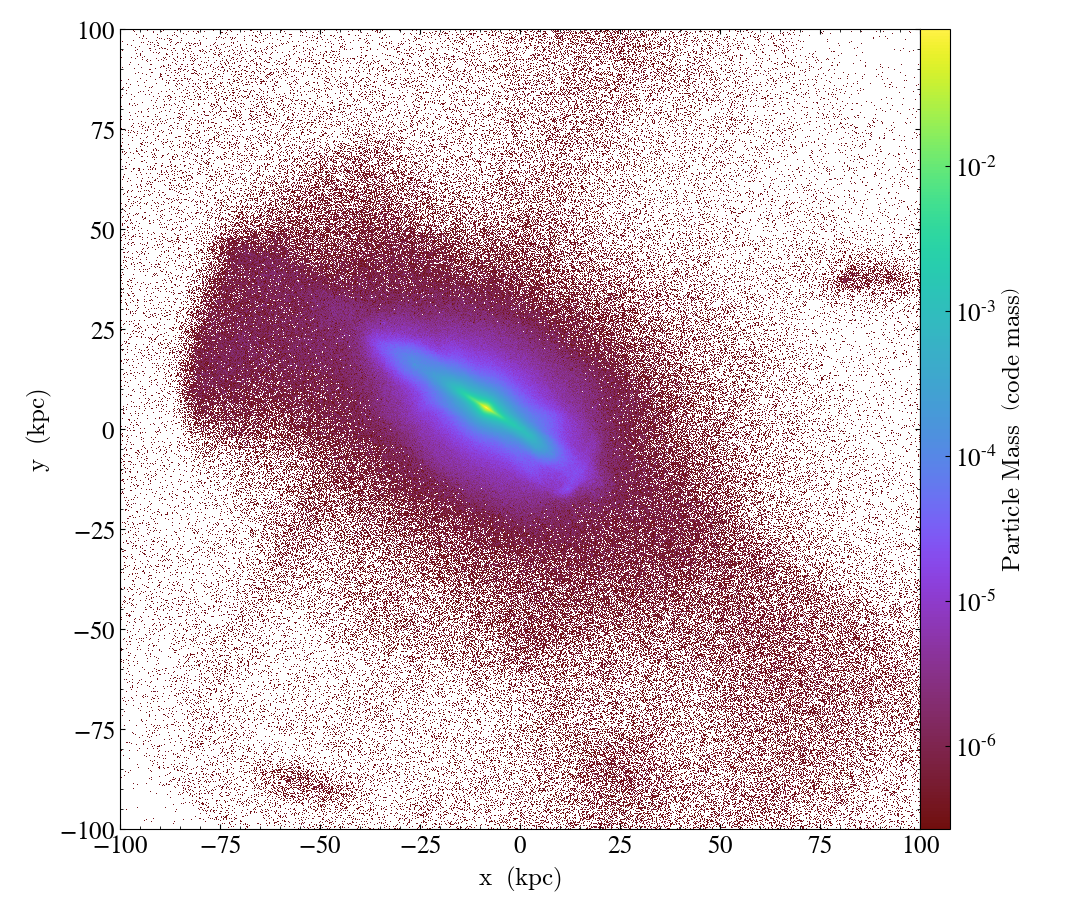

In [57]:
p = yt.ParticlePlot(ds, ('PartType4', 'particle_position_x'), ('PartType4', 'particle_position_y'), ('PartType4', 'particle_mass'),
                    center=center, width=new_box_size, data_source=box)
p.show()

### Normal Vector of Galactic Plane

#### Loading rockstar halos

In [140]:
rockstar600 = yt.load('/data1/shared/FIRE2/m12f_res7100/rockstar/snapshot_600/halos_0.0.bin')
rockstar600

yt : [INFO     ] 2023-02-21 18:52:23,416 Parameters: current_time              = 4.354556907576709e+17 s
yt : [INFO     ] 2023-02-21 18:52:23,418 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2023-02-21 18:52:23,420 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2023-02-21 18:52:23,422 Parameters: domain_right_edge         = [60. 60. 60.]
yt : [INFO     ] 2023-02-21 18:52:23,423 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2023-02-21 18:52:23,424 Parameters: current_redshift          = 0.0
yt : [INFO     ] 2023-02-21 18:52:23,425 Parameters: omega_lambda              = 0.7279999852180481
yt : [INFO     ] 2023-02-21 18:52:23,426 Parameters: omega_matter              = 0.2720000147819519
yt : [INFO     ] 2023-02-21 18:52:23,426 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2023-02-21 18:52:23,428 Parameters: hubble_constant           = 0.7020000219345093


halos_0.0.bin

In [143]:
rockstar600.field_list

[('all', 'A2x'),
 ('all', 'A2y'),
 ('all', 'A2z'),
 ('all', 'Ax'),
 ('all', 'Ay'),
 ('all', 'Az'),
 ('all', 'Jx'),
 ('all', 'Jy'),
 ('all', 'Jz'),
 ('all', 'Voff'),
 ('all', 'Xoff'),
 ('all', 'alt_m1'),
 ('all', 'alt_m2'),
 ('all', 'alt_m3'),
 ('all', 'alt_m4'),
 ('all', 'av_density'),
 ('all', 'b_to_a'),
 ('all', 'b_to_a2'),
 ('all', 'bh'),
 ('all', 'bullock_spin'),
 ('all', 'c_to_a'),
 ('all', 'c_to_a2'),
 ('all', 'child_r'),
 ('all', 'desc'),
 ('all', 'energy'),
 ('all', 'flags'),
 ('all', 'gas'),
 ('all', 'kin_to_pot'),
 ('all', 'klypin_rs'),
 ('all', 'm_pe_b'),
 ('all', 'm_pe_d'),
 ('all', 'mgrav'),
 ('all', 'min_bulkvel_err'),
 ('all', 'min_pos_err'),
 ('all', 'min_vel_err'),
 ('all', 'n_core'),
 ('all', 'num_child_particles'),
 ('all', 'num_p'),
 ('all', 'p_start'),
 ('all', 'particle_bulkvel_x'),
 ('all', 'particle_bulkvel_y'),
 ('all', 'particle_bulkvel_z'),
 ('all', 'particle_corevel_x'),
 ('all', 'particle_corevel_y'),
 ('all', 'particle_corevel_z'),
 ('all', 'particle_ident

In [5]:
ds = yt.load('/data1/shared/FIRE2/m12f_res7100/snapdir_600/snapshot_600.0.hdf5')
ds

yt : [INFO     ] 2023-02-28 16:06:18,350 Calculating time from 1.000e+00 to be 4.355e+17 seconds
yt : [INFO     ] 2023-02-28 16:06:18,351 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2023-02-28 16:06:18,367 Parameters: current_time              = 4.3545571088051386e+17 s
yt : [INFO     ] 2023-02-28 16:06:18,368 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2023-02-28 16:06:18,368 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2023-02-28 16:06:18,369 Parameters: domain_right_edge         = [60000. 60000. 60000.]
yt : [INFO     ] 2023-02-28 16:06:18,369 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2023-02-28 16:06:18,370 Parameters: current_redshift          = 0.0
yt : [INFO     ] 2023-02-28 16:06:18,370 Parameters: omega_lambda              = 0.728
yt : [INFO     ] 2023-02-28 16:06:18,370 Parameters: omega_matter              = 0.272
yt : [INFO     ] 2023-02-28 16:06:18,371 Parameters: omega_radiation           = 0.

snapshot_600

In [7]:
m_halo = rockstar600.r['halos', 'particle_mass'].to('Msun')
m_halo

YTArray([32612839.43682816,  2849665.50925069,  1020250.59134089, ...,
           773983.23792458,   773983.23792458,   773983.23792458]) Msun

In [161]:
sorted(m_halo.to('Msun'))[-5:]

[16519440258.766644 Msun,
 21352367104.909267 Msun,
 37924121800.78774 Msun,
 72218650917.264 Msun,
 1282256517518.9922 Msun]

In [9]:
idx_host = np.where(m_halo == max(m_halo))[0][0]
idx_host

16696

In [10]:
x = rockstar600.r['halos', 'particle_position_x'][idx_host].to("Mpc")
y = rockstar600.r['halos', 'particle_position_y'][idx_host].to("Mpc")
z = rockstar600.r['halos', 'particle_position_z'][idx_host].to("Mpc")
x, y, z

(38.711386337766776 Mpc, 47.66487450845273 Mpc, 46.81722923996608 Mpc)

In [11]:
cen_host = yt.units.yt_array.YTArray([x, y, z])
cen_host

YTArray([38.71138634, 47.66487451, 46.81722924]) Mpc

In [12]:
ad = ds.all_data()
coord = ad["PartType4", "Coordinates"]
vel = ad["PartType4", "Velocities"]

yt : [INFO     ] 2023-02-28 16:20:36,089 Allocating for 2.002e+08 particles (index particle type 'all')
yt : [INFO     ] 2023-02-28 16:21:36,656 Identified 1.257e+07 octs


In [13]:
m_star = ad["PartType4", "Masses"]

#### Define Smaller Box

In [45]:
new_box_size = ds.quan(2*200, "kpc") # 400x400x400 kpc

left_edge = cen_host - new_box_size / 2
right_edge = cen_host + new_box_size / 2

print(new_box_size.in_units("Mpc"))
print(left_edge.in_units("Mpc"))
print(right_edge.in_units("Mpc"))

0.4 Mpc
[38.51138634 47.46487451 46.61722924] Mpc
[38.91138634 47.86487451 47.01722924] Mpc


In [56]:
box = ds.region(cen_host, left_edge, right_edge)#, fields=None, ds=None, field_parameters=None, data_source=None)
box

YTRegion (snapshot_600): , center=[1.19450857e+26 1.47078435e+26 1.44462875e+26] cm, left_edge=[1.18833721e+26 1.46461299e+26 1.43845739e+26] cm, right_edge=[1.20067992e+26 1.47695570e+26 1.45080010e+26] cm

yt : [INFO     ] 2023-02-27 18:49:33,220 xlim = 27034.993209 27315.793209
yt : [INFO     ] 2023-02-27 18:49:33,222 ylim = 33320.341905 33601.141905
yt : [INFO     ] 2023-02-27 18:49:33,224 xlim = 27034.993209 27315.793209
yt : [INFO     ] 2023-02-27 18:49:33,224 ylim = 33320.341905 33601.141905
yt : [INFO     ] 2023-02-27 18:49:33,226 Splatting (('PartType4', 'particle_mass')) onto a 800 by 800 mesh
/home/dhhyun/anaconda3/envs/yttest2/lib/python3.9/_collections_abc.py:941: MatplotlibDeprecationWarning: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  self[key] = other[key]
/home/dhhyun/anaconda3/envs/yttest2/lib/python3.9/_collections_abc.py:941: MatplotlibDeprecationWarning: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
  self[key] = other[key]
/home/dhhyun/anaconda3/envs/yttest2/lib/python3.9/_col


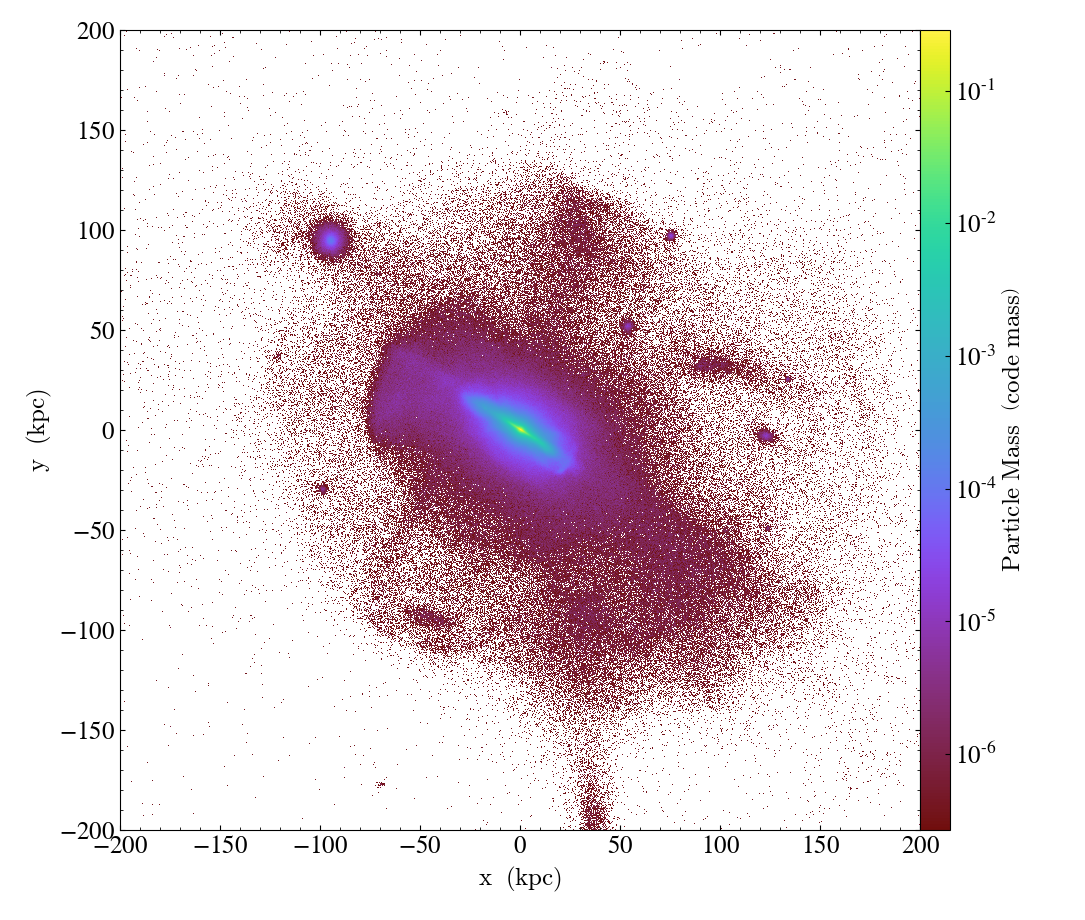

In [341]:
p = yt.ParticlePlot(ds, ('PartType4', 'particle_position_x'), ('PartType4', 'particle_position_y'), ('PartType4', 'particle_mass'),
                    center=cen_host, width=new_box_size, data_source=box)
p.show()

In [57]:
coord_box = box['PartType4', 'Coordinates']
coord_box

YTArray([[27138.9190463 , 33484.54843335, 32859.38510102],
         [27139.68341175, 33484.36698365, 32860.1708463 ],
         [27139.32048094, 33484.87363795, 32860.16528778],
         ...,
         [27130.24813227, 33413.15104813, 32921.08462193],
         [27130.87730305, 33413.79672934, 32921.8113876 ],
         [27126.80919159, 33413.41058775, 32921.12521402]]) code_length

In [58]:
vel_box = box['PartType4', 'Velocities']
vel_box

YTArray([[-258.81375122,  244.2427063 ,    1.13115764],
         [-261.4598999 ,  245.0866394 ,   15.8729763 ],
         [-248.07089233,  255.9813385 ,   -8.73585701],
         ...,
         [-223.64694214,  153.38931274,  134.57878113],
         [-143.25788879,  166.79263306,   63.37017441],
         [-116.77761841,  194.02253723,  107.46369934]]) code_velocity

In [75]:
m_box = box['PartType4', 'Masses']
m_box

YTArray([3.61676769e-07, 3.85887290e-07, 3.30019020e-07, ...,
         3.33533535e-07, 3.27745482e-07, 3.40157669e-07]) code_mass

In [61]:
x0 = cen_host[0].to('kpc')
y0 = cen_host[1].to('kpc')
z0 = cen_host[2].to('kpc')

coord_rel = coord_box.to('kpc').to_value() - np.array([[x0, y0, z0]])
coord_rel

array([[-51.95749689,  33.91243363,  -8.98835532],
       [-50.8686572 ,  33.65395829,  -7.86906006],
       [-51.38565266,  34.37568806,  -7.87697818],
       ...,
       [-64.30922627, -67.79324332,  78.90270011],
       [-63.41297161, -66.87346951,  79.93797883],
       [-69.20800217, -67.42352876,  78.9605236 ]])

In [62]:
xlist = coord_rel[:,0]
ylist = coord_rel[:,1]
zlist = coord_rel[:,2]

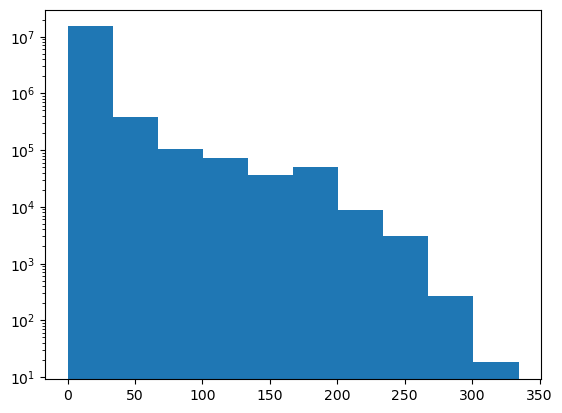

In [68]:
dist_cen = np.linalg.norm(coord_rel, axis=1)

plt.hist(dist_cen)
plt.yscale('log')

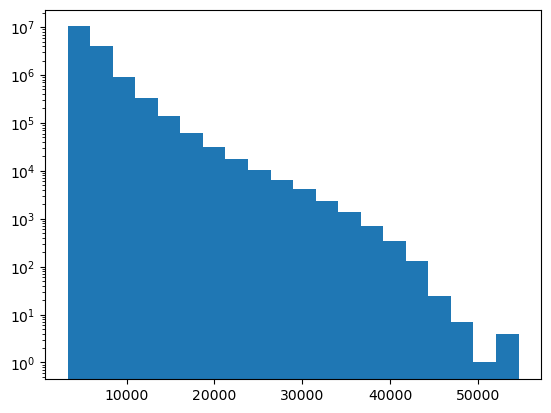

In [79]:
plt.hist(m_box.to("Msun").to_value(), bins=20)
plt.yscale('log')

In [82]:
min(m_box.to('Msun').to_value())

3307.548094227367

#### DataFrame Star

In [76]:
d_star = {'m': m_box.to('Msun'), 'x': xlist, 'y': ylist, 'z': zlist, 'central_distance': dist_cen, # kpc, km/s
         'vx': vel_box.to('km/s')[:,0], 'vy': vel_box.to('km/s')[:,1], 'vz': vel_box.to('km/s')[:,2]}

df_star = pd.DataFrame(data = d_star)
df_star

m          x          y          z  central_distance  \
0         5152.090720 -51.957497  33.912434  -8.988355         62.693103   
1         5496.969945 -50.868657  33.653958  -7.869060         61.499035   
2         4701.125643 -51.385653  34.375688  -7.876978         62.323511   
3         6558.535772 -51.208980  33.691743  -8.887321         61.939306   
4         5455.454006 -51.353414  33.796851  -8.960439         62.126401   
...               ...        ...        ...        ...               ...   
15775191  5457.901026 -61.768705 -71.191541  79.553575        123.338476   
15775192  5211.407880 -63.499997 -72.727044  79.136690        124.836246   
15775193  4751.189957 -64.309226 -67.793243  78.902700        122.299781   
15775194  4668.739064 -63.412972 -66.873470  79.937979        121.997321   
15775195  4845.550842 -69.208002 -67.423529  78.960524        124.781586   

                  vx          vy          vz  
0        -258.813751  244.242706    1.131158  
1        -261.459900  245.086639   15.872976  
2        -248.070892  255.981339   -8.735857  
3        -217.960785  114.111343   59.593037  
4        -293.497131  255.789871   35.505024  
...              ...         ...         ...  
15775191 -114.198151  178.095352   49.017944  
15775192 -174.612915  167.309341   82.023315  
15775193 -223.646942  153.389313  134.578781  
15775194 -143.257889  166.792633   63.370174  
15775195 -116.777618  194.022537  107.463699  

[15775196 rows x 8 columns]

In [70]:
min(df_star['central_distance'])

0.00565129316035537

#### Bulge-excluded J

In [86]:
# r, v, m = coord.to('Mpc'), vel.to('km/s'), m_star.to("Msun")
m = np.array(df_star['m'][df_star['central_distance']>5])
df = df_star[df_star['central_distance']>5] # > 5kpc
x = df['x']
y = df['y']
z = df['z']
r = np.column_stack((x,y,z))
vx = df['vx']
vy = df['vy']
vz = df['vz']
v = np.column_stack((vx,vy,vz))

# r = r.to_value() - cen_host.to('Mpc').to_value().reshape(1,3) # yt array
# r = r.to_value() - np.array([38.55662776, 47.82810106, 46.91190418]).reshape(1,3) # former COM
l = m.reshape(len(m),1) * np.cross(r, v, axis=1)
J = np.array(np.sum(l, axis=0))
normal = J/np.linalg.norm(J)
normal

array([-0.50310451, -0.86338097,  0.03819874])

In [211]:
r, v, m = coord.to('Mpc'), vel.to('km/s'), m_star.to("Msun")
m = np.array(df_star['m'][df_star['central_distance']>3])
df = df_star[df_star['central_distance']>3] # > 3kpc
x = df['x']
y = df['y']
z = df['z']
r = np.column_stack((x,y,z))
vx = df['vx']
vy = df['vy']
vz = df['vz']
v = np.column_stack((vx,vy,vz))

# r = r.to_value() - cen_host.to('Mpc').to_value().reshape(1,3) # yt array
# r = r.to_value() - np.array([38.55662776, 47.82810106, 46.91190418]).reshape(1,3) # former COM
l = m.reshape(len(m),1) * np.cross(r, v, axis=1)
J = np.array(np.sum(l, axis=0))
print(J/np.linalg.norm(J))
# normal

[-0.50123214 -0.86406638  0.04642887]


### Distance from Galactic Plane

In [91]:
# need a faster version of this...

def point_to_plane(plane_normal, point_on_plane, point):
    """
    Calculates the distance between a plane defined by its normal vector and a point to another point 
    & the radial distance of the point.
    """
    n = plane_normal/np.linalg.norm(plane_normal)
    d = np.dot(n, point - point_on_plane) # distance to the plane
    r = (point - point_on_plane) - d * n # radial distance
    return d, np.linalg.norm(r) # np.abs(d). beware of direction

dlist, rlist = np.zeros(len(df_star)), np.zeros(len(df_star))
for index, star in df_star.iterrows():
    coord_star = np.array([star['x'], star['y'], star['z']]) # in kpc
#     vel_star = np.array([star['vx'], star['vy'], star['vz']])
    d, r = point_to_plane(normal, np.zeros(3), coord_star)
    dlist[index] = d
    rlist[index] = r

In [92]:
df_star['vertical_distance'] = dlist # kpc
df_star['radial_distance'] = rlist # kpc
df_star

m          x          y          z  central_distance  \
0         5152.090720 -51.957497  33.912434  -8.988355         62.693103   
1         5496.969945 -50.868657  33.653958  -7.869060         61.499035   
2         4701.125643 -51.385653  34.375688  -7.876978         62.323511   
3         6558.535772 -51.208980  33.691743  -8.887321         61.939306   
4         5455.454006 -51.353414  33.796851  -8.960439         62.126401   
...               ...        ...        ...        ...               ...   
15775191  5457.901026 -61.768705 -71.191541  79.553575        123.338476   
15775192  5211.407880 -63.499997 -72.727044  79.136690        124.836246   
15775193  4751.189957 -64.309226 -67.793243  78.902700        122.299781   
15775194  4668.739064 -63.412972 -66.873470  79.937979        121.997321   
15775195  4845.550842 -69.208002 -67.423529  78.960524        124.781586   

                  vx          vy          vz  vertical_distance  \
0        -258.813751  244.242706    1.131158          -3.482643   
1        -261.459900  245.086639   15.872976          -3.764524   
2        -248.070892  255.981339   -8.735857          -4.127852   
3        -217.960785  114.111343   59.593037          -3.664825   
4        -293.497131  255.789871   35.505024          -3.685701   
...              ...         ...         ...                ...   
15775191 -114.198151  178.095352   49.017944          95.580382   
15775192 -174.612915  167.309341   82.023315          97.761203   
15775193 -223.646942  153.389313  134.578781          93.899642   
15775194 -143.257889  166.792633   63.370174          92.694163   
15775195 -116.777618  194.022537  107.463699          96.047242   

          radial_distance  
0               62.596297  
1               61.383708  
2               62.186661  
3               61.830791  
4               62.016976  
...                   ...  
15775191        77.953642  
15775192        77.632696  
15775193        78.358750  
15775194        79.316697  
15775195        79.657839  

[15775196 rows x 10 columns]

In [93]:
df_star_sel = df_star[np.abs(df_star['vertical_distance']) > 5] # > 5kpc
df_star_sel

m          x          y          z  central_distance  \
7         5142.776739 -51.498462  35.836957  -8.309315         63.288417   
8         4939.851807 -51.857356  35.948586  -8.611626         63.683956   
21        5469.606559 -50.211011  35.564571  -5.088293         61.740385   
35        5968.481651 -48.993296  34.972928 -15.105963         62.061573   
36        4819.924339 -47.318390  33.865275 -14.549997         59.979908   
...               ...        ...        ...        ...               ...   
15775191  5457.901026 -61.768705 -71.191541  79.553575        123.338476   
15775192  5211.407880 -63.499997 -72.727044  79.136690        124.836246   
15775193  4751.189957 -64.309226 -67.793243  78.902700        122.299781   
15775194  4668.739064 -63.412972 -66.873470  79.937979        121.997321   
15775195  4845.550842 -69.208002 -67.423529  78.960524        124.781586   

                  vx          vy          vz  vertical_distance  \
7        -258.404358  242.893997   -1.681878          -5.349243   
8        -258.024841  242.313507    6.102988          -5.276609   
21       -106.118385  126.164398   22.475983          -5.638754   
35        -83.044243   83.387238   81.871582          -6.123241   
36       -269.813049  217.759888  -15.518835          -5.988330   
...              ...         ...         ...                ...   
15775191 -114.198151  178.095352   49.017944          95.580382   
15775192 -174.612915  167.309341   82.023315          97.761203   
15775193 -223.646942  153.389313  134.578781          93.899642   
15775194 -143.257889  166.792633   63.370174          92.694163   
15775195 -116.777618  194.022537  107.463699          96.047242   

          radial_distance  
7               63.061948  
8               63.464980  
21              61.482352  
35              61.758763  
36              59.680225  
...                   ...  
15775191        77.953642  
15775192        77.632696  
15775193        78.358750  
15775194        79.316697  
15775195        79.657839  

[1279853 rows x 10 columns]

#### Plots of Subtracted Stars

Text(0.5, 0.92, 'galactic plane (5kpc) excluded')

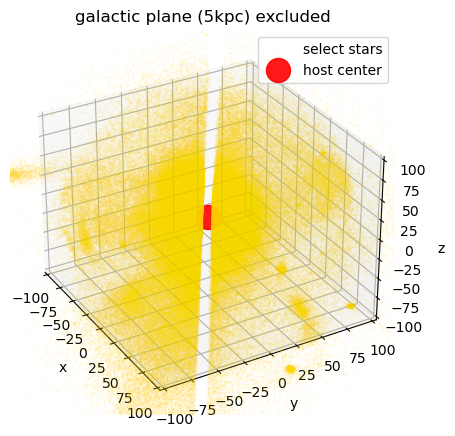

In [107]:
fig, ax = plt.subplots(ncols=1, figsize=(10, 5), subplot_kw={"projection":"3d"})

fontlabel = {"fontsize":"large", "color":"gray", "fontweight":"bold"}
lim = len(df_star_sel) #int(10**4.5) #

# stars
# m = m_star.to('Msun')[0:lim]
x = df_star_sel['x'][0:lim]
y = df_star_sel['y'][0:lim]
z = df_star_sel['z'][0:lim]
ax.scatter(x, y, z,  # 3D scatter plot c=m, cmap="inferno",
            c='gold', s=.1, alpha=0.1, label='select stars')

# center
ax.scatter(0, 0, 0,  # 3D scatter plot c=m, cmap="inferno",
            c='r', s=300, alpha=0.9, label='host center')

l = 100
ax.set_xlim(-l, l)
ax.set_ylim(-l, l)
ax.set_zlim(-l, l)
ax.legend(loc='upper right')

ax.view_init(elev=30., azim=-30)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('galactic plane (5kpc) excluded')

Text(0.5, 0.92, 'excluded disk stars')

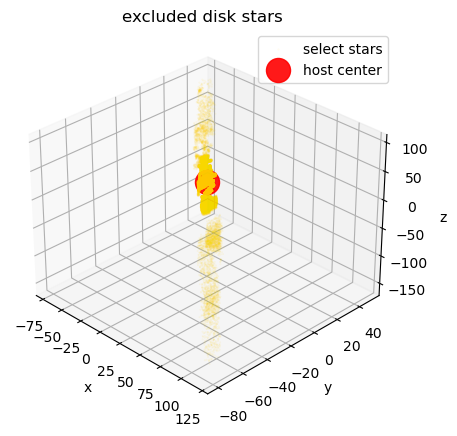

In [106]:
df_star_unsel = df_star[np.abs(df_star['vertical_distance']) <= 5]


fig, ax = plt.subplots(ncols=1, figsize=(10, 5), subplot_kw={"projection":"3d"})

fontlabel = {"fontsize":"large", "color":"gray", "fontweight":"bold"}
lim = len(df_star_sel) #int(10**4.5) #

# stars
# m = m_star.to('Msun')[0:lim]
x = df_star_unsel['x'][0:lim]
y = df_star_unsel['y'][0:lim]
z = df_star_unsel['z'][0:lim]
ax.scatter(x, y, z,  # 3D scatter plot c=m, cmap="inferno",
            c='gold', s=.1, alpha=0.1, label='select stars')

# center
ax.scatter(0, 0, 0,  # 3D scatter plot c=m, cmap="inferno",
            c='r', s=300, alpha=0.9, label='host center')

# l = 100
# ax.set_xlim(-l, l)
# ax.set_ylim(-l, l)
# ax.set_zlim(-l, l)
ax.legend(loc='upper right')

ax.view_init(elev=30., azim=-45)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('excluded disk stars')

### Coordinate Transformations

#### Rotational Matrix

In [111]:
def rotation_matrix_from_vectors(vec1, vec2):
    """ Find the rotation matrix that aligns vec1 to vec2
    :param vec1: A 3d "source" vector
    :param vec2: A 3d "destination" vector
    :return mat: A transform matrix (3x3) which when applied to vec1, aligns it with vec2.
    https://stackoverflow.com/questions/45142959/calculate-rotation-matrix-to-align-two-vectors-in-3d-space
    """
    a, b = (vec1 / np.linalg.norm(vec1)), (vec2 / np.linalg.norm(vec2))
    v = np.cross(a, b)
    c = np.dot(a, b)
    s = np.linalg.norm(v)
    kmat = np.array([[0, -v[2], v[1]], [v[2], 0, -v[0]], [-v[1], v[0], 0]])
    rotation_matrix = np.eye(3) + kmat + kmat@kmat * ((1 - c) / (s ** 2))
    return rotation_matrix

rotation_matrix_from_vectors(np.array([1,0,0]), np.array([0,0,1]))# @ np.array([1,0,0])

array([[ 0.,  0., -1.],
       [ 0.,  1.,  0.],
       [ 1.,  0.,  0.]])

In [112]:
rotmat = rotation_matrix_from_vectors(np.array([0,0,1]), normal)
rotmat

array([[ 0.75619875, -0.41838894, -0.50310451],
       [-0.41838894,  0.28199999, -0.86338097],
       [ 0.50310451,  0.86338097,  0.03819874]])

In [113]:
np.linalg.det(rotmat)

1.0

In [114]:
normal

array([-0.50310451, -0.86338097,  0.03819874])

In [115]:
np.linalg.inv(rotmat)@normal

array([1.66533454e-16, 8.32667268e-17, 1.00000000e+00])

In [412]:
rotmat @ np.array([0,0,1])

array([-0.68268264, -0.72313221,  0.10499625])

In [415]:
rotmat @ np.array([1,0,0])

array([ 0.57822881, -0.44676152,  0.68268264])

In [464]:
np.linalg.norm(rotmat @ np.array([1,0,0]))

1.0

In [427]:
test = np.zeros((3,2))
test[1,:] = np.array([1,1])
test

array([[0., 0.],
       [1., 1.],
       [0., 0.]])

In [116]:
x = np.array(df_star_sel['x'])
y = np.array(df_star_sel['y'])
z = np.array(df_star_sel['z'])

xyz_rot = np.zeros((len(x), 3))

rotmatinv = np.linalg.inv(rotmat)

for i in range(len(x)):
    coord_rot = rotmatinv @ np.array([x[i], y[i], z[i]])
    xyz_rot[i, :] = coord_rot

In [117]:
xyz_rot

array([[-58.11731228,  24.47830355,  -5.34924333],
       [-58.58750576,  24.39893093,  -5.27660872],
       [-55.40927017,  26.64380507,  -5.63875405],
       ...,
       [ 19.42969093,  75.91166504,  93.89964179],
       [ 20.2434678 ,  76.68989816,  92.69416316],
       [ 15.59964951,  78.11544187,  96.04724232]])

In [127]:
df_star_sel = df_star_sel.copy() # prevents 'A value is trying to be set on a copy of a slice from a DataFrame' error

In [128]:
df_star_sel['x_rot'] = xyz_rot[:, 0]
df_star_sel['y_rot'] = xyz_rot[:, 1]
df_star_sel['z_rot'] = xyz_rot[:, 2]
df_star_sel

m          x          y          z  central_distance  \
7         5142.776739 -51.498462  35.836957  -8.309315         63.288417   
8         4939.851807 -51.857356  35.948586  -8.611626         63.683956   
21        5469.606559 -50.211011  35.564571  -5.088293         61.740385   
35        5968.481651 -48.993296  34.972928 -15.105963         62.061573   
36        4819.924339 -47.318390  33.865275 -14.549997         59.979908   
...               ...        ...        ...        ...               ...   
15775191  5457.901026 -61.768705 -71.191541  79.553575        123.338476   
15775192  5211.407880 -63.499997 -72.727044  79.136690        124.836246   
15775193  4751.189957 -64.309226 -67.793243  78.902700        122.299781   
15775194  4668.739064 -63.412972 -66.873470  79.937979        121.997321   
15775195  4845.550842 -69.208002 -67.423529  78.960524        124.781586   

                  vx          vy          vz  vertical_distance  \
7        -258.404358  242.893997   -1.681878          -5.349243   
8        -258.024841  242.313507    6.102988          -5.276609   
21       -106.118385  126.164398   22.475983          -5.638754   
35        -83.044243   83.387238   81.871582          -6.123241   
36       -269.813049  217.759888  -15.518835          -5.988330   
...              ...         ...         ...                ...   
15775191 -114.198151  178.095352   49.017944          95.580382   
15775192 -174.612915  167.309341   82.023315          97.761203   
15775193 -223.646942  153.389313  134.578781          93.899642   
15775194 -143.257889  166.792633   63.370174          92.694163   
15775195 -116.777618  194.022537  107.463699          96.047242   

          radial_distance      x_rot      y_rot      z_rot  
7               63.061948 -58.117312  24.478304  -5.349243  
8               63.464980 -58.587506  24.398931  -5.276609  
21              61.482352 -55.409270  26.643805  -5.638754  
35              61.758763 -59.280833  17.318417  -6.123241  
36              59.680225 -57.271133  16.785307  -5.988330  
...                   ...        ...        ...        ...  
15775191        77.953642  23.100098  74.452372  95.580382  
15775192        77.632696  22.223598  74.383784  97.761203  
15775193        78.358750  19.429691  75.911665  93.899642  
15775194        79.316697  20.243468  76.689898  92.694163  
15775195        79.657839  15.599650  78.115442  96.047242  

[1279853 rows x 13 columns]

In [497]:
def cartesian_to_spherical(x, y, z, vx, vy, vz):
    r = np.sqrt(x**2 + y**2 + z**2)
    theta = np.arccos(z/r)
    phi = np.arctan2(y, x)
    v_r = (x*vx + y*vy + z*vz)/r
    v_phi = (x*vy - y*vx)/(r*np.sin(theta))
    # too complex formula? exploiting orthogonality
#     v_theta =  np.sqrt(np.linalg.norm([vx, vy, vz])**2 - (v_r**2 + v_phi**2)) #(vx*z - vz*x)/(r*np.sin(theta))
    v_theta = (-vx*x*z - vy*y*z + vz*(x**2 + y**2))/(r**2 * np.sin(theta)) # a little bit prone to error
    return r, theta, phi, v_r, v_theta, v_phi

print(cartesian_to_spherical(3,3,0, 1,-1,-5))

(4.242640687119285, 1.5707963267948966, 0.7853981633974483, 0.0, -5.000000000000001, -1.4142135623730951)


In [400]:
np.pi/2

1.5707963267948966

#### Cartesian to Spherical

In [119]:
# exploiting numpy!!!! - one second whip

def cartesian_to_spherical_array(pos, vel):
    r = np.linalg.norm(pos, axis=1)
    theta = np.arccos(pos[:,2]/r)
    phi = np.arctan2(pos[:,1], pos[:,0])
    v_r = np.sum(pos*vel, axis=1)/r
    v_phi = (vel[:, 1] * pos[:, 0] - vel[:, 0] * pos[:, 1]) / (r * np.sin(theta))
    # indirectly # sign lost
#     v_theta = np.sqrt(np.sum(vel*vel, axis=1) - v_r**2 - v_phi**2) # (np.sum(vel*pos[:, :2], axis=1) * pos[:, 2] - v_r * r * np.sin(theta)) / (r * np.cos(theta))
    v_theta = (-vel[:,0]*pos[:,0]*pos[:,2] - vel[:,1]*pos[:,1]*pos[:,2] + vel[:,2]*(pos[:,0]**2 + pos[:,1]**2))/(r**2 * np.sin(theta))
    return np.column_stack((r, theta, phi)), np.column_stack((v_r, v_theta, v_phi))

pos = np.column_stack((df_star_sel['x'], df_star_sel['y'], df_star_sel['z'])) # kpc
vel = np.column_stack((df_star_sel['vx'], df_star_sel['vy'], df_star_sel['vz'])) # km/s

pos_spherical, vel_spherical = cartesian_to_spherical_array(pos, vel)

In [120]:
pos_spherical

array([[ 63.28841708,   1.7024693 ,   2.53363444],
       [ 63.68395607,   1.70643628,   2.53543114],
       [ 61.74038481,   1.65330424,   2.52531643],
       ...,
       [122.29978131,   0.86956608,  -2.32982701],
       [121.99732108,   0.85629112,  -2.32964004],
       [124.78158551,   0.88564542,  -2.36925423]])

In [121]:
vel_spherical

array([[ 348.02551332,   44.39567864,  -51.77258511],
       [ 346.06451305,   53.38974379,  -52.1420078 ],
       [ 157.12454385,   35.54622031,  -41.61827496],
       ...,
       [ 119.39867642,   75.31944665, -267.82199564],
       [  24.5586543 ,   62.58561348, -218.7196782 ],
       [  27.9340217 ,  115.95583272, -220.46346428]])

In [123]:
np.shape(pos_spherical)

(1279853, 3)

In [124]:
max(pos_spherical[:,1])

3.128438765685415

In [125]:
max(pos_spherical[:,2])

3.141591890471724

In [126]:
min(vel_spherical[:,1])

-529.7509128078333

In [129]:
df_star_sel['r'] = pos_spherical[:, 0] # kpc
df_star_sel['theta'] = pos_spherical[:, 1] # radian
df_star_sel['phi'] = pos_spherical[:, 2]

df_star_sel['v_r'] = vel_spherical[:, 0]
df_star_sel['v_theta'] = vel_spherical[:, 1]
df_star_sel['v_phi'] = vel_spherical[:, 2]
df_star_sel

m          x          y          z  central_distance  \
7         5142.776739 -51.498462  35.836957  -8.309315         63.288417   
8         4939.851807 -51.857356  35.948586  -8.611626         63.683956   
21        5469.606559 -50.211011  35.564571  -5.088293         61.740385   
35        5968.481651 -48.993296  34.972928 -15.105963         62.061573   
36        4819.924339 -47.318390  33.865275 -14.549997         59.979908   
...               ...        ...        ...        ...               ...   
15775191  5457.901026 -61.768705 -71.191541  79.553575        123.338476   
15775192  5211.407880 -63.499997 -72.727044  79.136690        124.836246   
15775193  4751.189957 -64.309226 -67.793243  78.902700        122.299781   
15775194  4668.739064 -63.412972 -66.873470  79.937979        121.997321   
15775195  4845.550842 -69.208002 -67.423529  78.960524        124.781586   

                  vx          vy          vz  vertical_distance  \
7        -258.404358  242.893997   -1.681878          -5.349243   
8        -258.024841  242.313507    6.102988          -5.276609   
21       -106.118385  126.164398   22.475983          -5.638754   
35        -83.044243   83.387238   81.871582          -6.123241   
36       -269.813049  217.759888  -15.518835          -5.988330   
...              ...         ...         ...                ...   
15775191 -114.198151  178.095352   49.017944          95.580382   
15775192 -174.612915  167.309341   82.023315          97.761203   
15775193 -223.646942  153.389313  134.578781          93.899642   
15775194 -143.257889  166.792633   63.370174          92.694163   
15775195 -116.777618  194.022537  107.463699          96.047242   

          radial_distance      x_rot      y_rot      z_rot           r  \
7               63.061948 -58.117312  24.478304  -5.349243   63.288417   
8               63.464980 -58.587506  24.398931  -5.276609   63.683956   
21              61.482352 -55.409270  26.643805  -5.638754   61.740385   
35              61.758763 -59.280833  17.318417  -6.123241   62.061573   
36              59.680225 -57.271133  16.785307  -5.988330   59.979908   
...                   ...        ...        ...        ...         ...   
15775191        77.953642  23.100098  74.452372  95.580382  123.338476   
15775192        77.632696  22.223598  74.383784  97.761203  124.836246   
15775193        78.358750  19.429691  75.911665  93.899642  122.299781   
15775194        79.316697  20.243468  76.689898  92.694163  121.997321   
15775195        79.657839  15.599650  78.115442  96.047242  124.781586   

             theta       phi         v_r     v_theta       v_phi  
7         1.702469  2.533634  348.025513   44.395679  -51.772585  
8         1.706436  2.535431  346.064513   53.389744  -52.142008  
21        1.653304  2.525316  157.124544   35.546220  -41.618275  
35        1.816669  2.521644   92.620242  107.653253  -19.621455  
36        1.815822  2.520414  339.570656   68.912973  -20.051331  
...            ...       ...         ...         ...         ...  
15775191  0.869770 -2.285443  -13.989616   75.952282 -202.971605  
15775192  0.884180 -2.288565   43.345260   70.527596 -241.571846  
15775193  0.869566 -2.329827  119.398676   75.319447 -267.821996  
15775194  0.856291 -2.329640   24.558654   62.585613 -218.719678  
15775195  0.885645 -2.369254   27.934022  115.955833 -220.463464  

[1279853 rows x 19 columns]

### DataFrame Halo

In [130]:
x0 = cen_host[0].to('kpc')
y0 = cen_host[1].to('kpc')
z0 = cen_host[2].to('kpc')

x = rockstar600.r['halos', 'particle_position_x'].to('kpc')
y = rockstar600.r['halos', 'particle_position_y'].to('kpc')
z = rockstar600.r['halos', 'particle_position_z'].to('kpc')

d_subhalo = {'m': rockstar600.r['halos', 'particle_mass'].to('Msun'), 'x': x - x0, 'y': y - y0, 'z': z - z0}
df_halo = pd.DataFrame(data = d_subhalo)
df_halo

m            x            y            z
0      3.261284e+07  -315.057576  -133.438324  -200.608511
1      2.849666e+06  -277.549105  -254.916322    15.921742
2      1.020251e+06  -272.775299  -248.422642   -27.072395
3      5.980779e+05  -293.397487  -257.231223    21.730732
4      1.829415e+06  -284.317203  -264.398724    26.588765
...             ...          ...          ...          ...
70046  7.388021e+05 -1241.295387 -1105.865487 -1021.947584
70047  8.091642e+05  -584.588753  -646.531392 -1675.344888
70048  7.739832e+05  -546.615670 -2449.728408    -7.232709
70049  7.739832e+05  -593.334842 -2421.767548    65.855149
70050  7.739832e+05  -542.434176 -2746.043975   108.876456

[70051 rows x 4 columns]

(array([  178.,  2302.,  6530.,  6644., 11684., 27274.,  8220.,  4433.,
         2670.,   116.]),
 array([-4548.36611108, -3684.47713398, -2820.58815688, -1956.69917978,
        -1092.81020268,  -228.92122559,   634.96775151,  1498.85672861,
         2362.74570571,  3226.6346828 ,  4090.5236599 ]),
 <BarContainer object of 10 artists>)

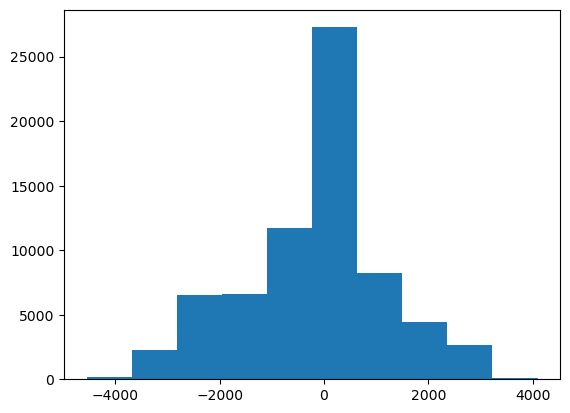

In [131]:
plt.hist(df_halo['x'])

In [133]:
df_halo_sel = df_halo[df_halo['m'] > 3*1e6]
df_halo_sel

m            x            y            z
0      3.261284e+07  -315.057576  -133.438324  -200.608511
11     3.975459e+06  -277.584426  -131.862452   -46.770795
12     5.312339e+06  -282.594612  -188.539505   -17.611729
17     1.270036e+07  -365.211062   -51.482109  -155.136451
19     4.038785e+07  -321.342045    -5.950275  -160.086863
...             ...          ...          ...          ...
40683  3.025571e+06   630.658557    20.861285    29.898096
40719  3.095933e+06   395.850906 -1878.972008   -67.876613
40778  3.025571e+06 -1050.253507   450.721140 -1849.562976
40795  3.095933e+06  -628.528412  -711.566001  -148.121104
40868  3.025571e+06 -1659.713867   581.964111   747.811058

[17143 rows x 4 columns]

In [511]:
new_box_size

400.0 kpc

In [134]:
l = new_box_size.to_value()*3/4

df_halo_sel2 = df_halo_sel[(df_halo_sel['x']>-l) & 
                          (df_halo_sel['y']>-l) & 
                          (df_halo_sel['z']>-l) & 
                          (df_halo_sel['x']<l) & 
                          (df_halo_sel['y']<l) & 
                          (df_halo_sel['z']<l)
                         ]
df_halo_sel2

m           x           y           z
11     3.975459e+06 -277.584426 -131.862452  -46.770795
12     5.312339e+06 -282.594612 -188.539505  -17.611729
33     2.328986e+07 -299.980828  -63.371792 -164.526475
37     9.147075e+06 -281.869168  -91.987455 -182.665306
95     6.367771e+06 -278.252813 -117.043820  -83.113665
...             ...         ...         ...         ...
35498  3.095933e+06 -288.221562 -276.038441 -232.457428
36190  3.694011e+06   59.244638  287.074979 -207.243475
36607  3.095933e+06   72.245582 -249.433374 -231.473867
36756  3.799554e+06  239.554286  298.872284  208.031411
38659  3.201476e+06  214.397391  270.832629  287.781405

[3211 rows x 4 columns]

In [ ]:
# legacy, tested
nearest = []
# dists_host = []
dists_subh = [] # kpc

xlist = df_halo_sel2['x']
ylist = df_halo_sel2['y']
zlist = df_halo_sel2['z']
idx_list = df_halo_sel2.index

for index, star in df_star_sel.iterrows():
    # dist to host galaxy
    coord_star = np.array([star['x'], star['y'], star['z']])
#     dist_host = np.linalg.norm(coord_star - np.array(center))
    
    # dist to the nearest subhalo & its index
    dlist = (xlist - coord_star[0])**2 + (ylist - coord_star[1])**2 + (zlist - coord_star[2])**2
    spotter = np.where(dlist == min(dlist))
    idx = idx_list[spotter][0]
    dist_subh = np.sqrt(np.array(dlist)[spotter][0])
    
    # append
#     dists_host.append(dist_host)
    dists_subh.append(dist_subh)
    nearest.append(idx)

In [527]:
np.eye(3) - np.array([[1,2,3]])

array([[ 0., -2., -3.],
       [-1., -1., -3.],
       [-1., -2., -2.]])

In [139]:
# faster numpy ver; yet to be tested
# not much difference?
import time
start = time.time()

nearest = []
# dists_host = []
dists_subh = [] # kpc

xlist = df_halo_sel2['x']
ylist = df_halo_sel2['y']
zlist = df_halo_sel2['z']
coord_halo = np.column_stack((xlist,ylist,zlist))
idx_list = df_halo_sel2.index

for index, star in df_star_sel.iterrows():
    coord_star = np.array([star['x'], star['y'], star['z']]).reshape(1,3) # array([[-69, -67, 78]])
    # dist to the nearest subhalo & its index
    dlist = np.linalg.norm(coord_halo - coord_star, axis=1)
    
    spotter = np.where(dlist == min(dlist))
    idx = idx_list[spotter][0]
    dist_subh = np.array(dlist)[spotter][0]
    
    # append
#     dists_host.append(dist_host)
    dists_subh.append(dist_subh)
    nearest.append(idx)
    
print("time (s):", time.time() - start)

time : 340.77341294288635


In [141]:
df_star_sel['dist_to_closest_subhalo'] = dists_subh
df_star_sel['closest_subhalo'] = nearest
df_star_sel

m          x          y          z  central_distance  \
7         5142.776739 -51.498462  35.836957  -8.309315         63.288417   
8         4939.851807 -51.857356  35.948586  -8.611626         63.683956   
21        5469.606559 -50.211011  35.564571  -5.088293         61.740385   
35        5968.481651 -48.993296  34.972928 -15.105963         62.061573   
36        4819.924339 -47.318390  33.865275 -14.549997         59.979908   
...               ...        ...        ...        ...               ...   
15775191  5457.901026 -61.768705 -71.191541  79.553575        123.338476   
15775192  5211.407880 -63.499997 -72.727044  79.136690        124.836246   
15775193  4751.189957 -64.309226 -67.793243  78.902700        122.299781   
15775194  4668.739064 -63.412972 -66.873470  79.937979        121.997321   
15775195  4845.550842 -69.208002 -67.423529  78.960524        124.781586   

                  vx          vy          vz  vertical_distance  \
7        -258.404358  242.893997   -1.681878          -5.349243   
8        -258.024841  242.313507    6.102988          -5.276609   
21       -106.118385  126.164398   22.475983          -5.638754   
35        -83.044243   83.387238   81.871582          -6.123241   
36       -269.813049  217.759888  -15.518835          -5.988330   
...              ...         ...         ...                ...   
15775191 -114.198151  178.095352   49.017944          95.580382   
15775192 -174.612915  167.309341   82.023315          97.761203   
15775193 -223.646942  153.389313  134.578781          93.899642   
15775194 -143.257889  166.792633   63.370174          92.694163   
15775195 -116.777618  194.022537  107.463699          96.047242   

          radial_distance  ...      y_rot      z_rot           r     theta  \
7               63.061948  ...  24.478304  -5.349243   63.288417  1.702469   
8               63.464980  ...  24.398931  -5.276609   63.683956  1.706436   
21              61.482352  ...  26.643805  -5.638754   61.740385  1.653304   
35              61.758763  ...  17.318417  -6.123241   62.061573  1.816669   
36              59.680225  ...  16.785307  -5.988330   59.979908  1.815822   
...                   ...  ...        ...        ...         ...       ...   
15775191        77.953642  ...  74.452372  95.580382  123.338476  0.869770   
15775192        77.632696  ...  74.383784  97.761203  124.836246  0.884180   
15775193        78.358750  ...  75.911665  93.899642  122.299781  0.869566   
15775194        79.316697  ...  76.689898  92.694163  121.997321  0.856291   
15775195        79.657839  ...  78.115442  96.047242  124.781586  0.885645   

               phi         v_r     v_theta       v_phi  \
7         2.533634  348.025513   44.395679  -51.772585   
8         2.535431  346.064513   53.389744  -52.142008   
21        2.525316  157.124544   35.546220  -41.618275   
35        2.521644   92.620242  107.653253  -19.621455   
36        2.520414  339.570656   68.912973  -20.051331   
...            ...         ...         ...         ...   
15775191 -2.285443  -13.989616   75.952282 -202.971605   
15775192 -2.288565   43.345260   70.527596 -241.571846   
15775193 -2.329827  119.398676   75.319447 -267.821996   
15775194 -2.329640   24.558654   62.585613 -218.719678   
15775195 -2.369254   27.934022  115.955833 -220.463464   

          dist_to_closest_subhalo  closest_subhalo  
7                       13.706301             1245  
8                       14.026253             1245  
21                      12.374831             1245  
35                      15.066513            16456  
36                      14.757757             1245  
...                           ...              ...  
15775191                21.707833             2316  
15775192                19.412699             2316  
15775193                23.186499             2316  
15775194                23.072850            16960  
15775195                21.801457             2316  

[1279853 rows x 21 columns]

In [146]:
group = []
for d, idx in zip(df_star_sel['dist_to_closest_subhalo'], df_star_sel['closest_subhalo']):
    # dwarf galaxy: 300 ly ~ 7000 ly (Magellanic Cloud)
#     if idx == idx_host: 
#         group.append('bulge_star') # ~ 1kpc
    if d<1: # 1 kpc: Bazarov Criterion
        group.append('halo_associated')
    elif d>=1: 
        group.append('background')
#     else:
#         group.append(np.nan)
# group

In [147]:
df_star_sel['group'] = group
df_star_sel

m          x          y          z  central_distance  \
7         5142.776739 -51.498462  35.836957  -8.309315         63.288417   
8         4939.851807 -51.857356  35.948586  -8.611626         63.683956   
21        5469.606559 -50.211011  35.564571  -5.088293         61.740385   
35        5968.481651 -48.993296  34.972928 -15.105963         62.061573   
36        4819.924339 -47.318390  33.865275 -14.549997         59.979908   
...               ...        ...        ...        ...               ...   
15775191  5457.901026 -61.768705 -71.191541  79.553575        123.338476   
15775192  5211.407880 -63.499997 -72.727044  79.136690        124.836246   
15775193  4751.189957 -64.309226 -67.793243  78.902700        122.299781   
15775194  4668.739064 -63.412972 -66.873470  79.937979        121.997321   
15775195  4845.550842 -69.208002 -67.423529  78.960524        124.781586   

                  vx          vy          vz  vertical_distance  \
7        -258.404358  242.893997   -1.681878          -5.349243   
8        -258.024841  242.313507    6.102988          -5.276609   
21       -106.118385  126.164398   22.475983          -5.638754   
35        -83.044243   83.387238   81.871582          -6.123241   
36       -269.813049  217.759888  -15.518835          -5.988330   
...              ...         ...         ...                ...   
15775191 -114.198151  178.095352   49.017944          95.580382   
15775192 -174.612915  167.309341   82.023315          97.761203   
15775193 -223.646942  153.389313  134.578781          93.899642   
15775194 -143.257889  166.792633   63.370174          92.694163   
15775195 -116.777618  194.022537  107.463699          96.047242   

          radial_distance  ...      z_rot           r     theta       phi  \
7               63.061948  ...  -5.349243   63.288417  1.702469  2.533634   
8               63.464980  ...  -5.276609   63.683956  1.706436  2.535431   
21              61.482352  ...  -5.638754   61.740385  1.653304  2.525316   
35              61.758763  ...  -6.123241   62.061573  1.816669  2.521644   
36              59.680225  ...  -5.988330   59.979908  1.815822  2.520414   
...                   ...  ...        ...         ...       ...       ...   
15775191        77.953642  ...  95.580382  123.338476  0.869770 -2.285443   
15775192        77.632696  ...  97.761203  124.836246  0.884180 -2.288565   
15775193        78.358750  ...  93.899642  122.299781  0.869566 -2.329827   
15775194        79.316697  ...  92.694163  121.997321  0.856291 -2.329640   
15775195        79.657839  ...  96.047242  124.781586  0.885645 -2.369254   

                 v_r     v_theta       v_phi  dist_to_closest_subhalo  \
7         348.025513   44.395679  -51.772585                13.706301   
8         346.064513   53.389744  -52.142008                14.026253   
21        157.124544   35.546220  -41.618275                12.374831   
35         92.620242  107.653253  -19.621455                15.066513   
36        339.570656   68.912973  -20.051331                14.757757   
...              ...         ...         ...                      ...   
15775191  -13.989616   75.952282 -202.971605                21.707833   
15775192   43.345260   70.527596 -241.571846                19.412699   
15775193  119.398676   75.319447 -267.821996                23.186499   
15775194   24.558654   62.585613 -218.719678                23.072850   
15775195   27.934022  115.955833 -220.463464                21.801457   

          closest_subhalo       group  
7                    1245  background  
8                    1245  background  
21                   1245  background  
35                  16456  background  
36                   1245  background  
...                   ...         ...  
15775191             2316  background  
15775192             2316  background  
15775193             2316  background  
15775194            16960  background  
15775195             2316  background  

[1279853 rows x 22 

### Testing UMAP dimension reduction

Not used in later stages.

In [148]:
import umap
stars_umap = df_star_sel.dropna()
stars_umap.group.value_counts()

background         1276580
halo_associated       3273
Name: group, dtype: int64

In [149]:
len(stars_umap)

1279853

In [150]:
reducer = umap.UMAP()

In [151]:
stars_umap_data = stars_umap[
    [
        'x', 'y', 'z',
        'vx', 'vy', 'vz'
    ]
].values
stars_umap_data

array([[ -51.49846175,   35.83695662,   -8.30931485, -258.40435791,
         242.89399719,   -1.68187833],
       [ -51.85735564,   35.94858595,   -8.61162557, -258.02484131,
         242.31350708,    6.10298824],
       [ -50.21101142,   35.56457121,   -5.08829277, -106.11838531,
         126.16439819,   22.47598267],
       ...,
       [ -64.30922627,  -67.79324332,   78.90270011, -223.64694214,
         153.38931274,  134.57878113],
       [ -63.41297161,  -66.87346951,   79.93797883, -143.25788879,
         166.79263306,   63.37017441],
       [ -69.20800217,  -67.42352876,   78.9605236 , -116.77761841,
         194.02253723,  107.46369934]])

In [152]:
from sklearn.preprocessing import StandardScaler
scaled_stars_umap_data = StandardScaler().fit_transform(stars_umap_data)
scaled_stars_umap_data

array([[-1.46582927,  1.00314699, -0.09827152, -0.98165378,  0.76915997,
        -1.07897414],
       [-1.47592766,  1.00626239, -0.10559147, -0.97797161,  0.76318623,
        -1.00784404],
       [-1.42960361,  0.99554513, -0.02027992,  0.49586505, -0.43208556,
        -0.85824445],
       ...,
       [-1.82629245, -1.88901271,  2.01341992, -0.64442813, -0.15191834,
         0.16603565],
       [-1.80107406, -1.86334324,  2.03848744,  0.13552776, -0.01398693,
        -0.48459538],
       [-1.96413186, -1.87869455,  2.01482002,  0.39244635,  0.26623163,
        -0.08171409]])

In [153]:
embedding = reducer.fit_transform(scaled_stars_umap_data)
embedding.shape

(1279853, 2)

Text(0.05, 0.7, 'Criteria: <=1, >1 kpc \n\nBlue:     halo_associated\nOrange: background')

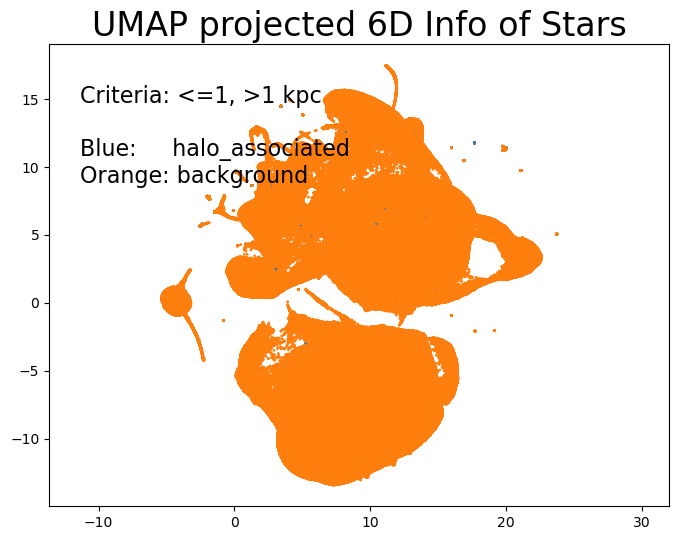

In [154]:
import seaborn as sns

plt.figure(figsize=(8,6))
plt.scatter(
    embedding[:, 0],
    embedding[:, 1], s=1,
    c=[sns.color_palette()[x] for x in stars_umap.group.map({"halo_associated":0, "background":1})])
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projected 6D Info of Stars', fontsize=24)
plt.annotate('Criteria: <=1, >1 kpc \n\nBlue:     halo_associated\nOrange: background',
             xy=(0.05, 0.70), xycoords='axes fraction', fontsize=16)
# plt.text(-8, 14, 'Criteria: <=1, >1 kpc', fontsize=16)

#### Spherical Umap

In [155]:
import umap
from sklearn.preprocessing import StandardScaler

stars_umap = df_star_sel.dropna()
print(stars_umap.group.value_counts())

stars_umap_data = stars_umap[
    [
        'r', 'theta', 'phi',
        'v_r', 'v_theta', 'v_phi'
    ]
].values

reducer = umap.UMAP()

scaled_stars_umap_data = StandardScaler().fit_transform(stars_umap_data)
# scaled_stars_umap_data

embedding = reducer.fit_transform(scaled_stars_umap_data)
embedding.shape

background         1276580
halo_associated       3273
Name: group, dtype: int64


(1279853, 2)

Text(0.05, 0.7, 'Criteria: <=1, >1 kpc \n\nBlue:     halo_associated\nOrange: background')

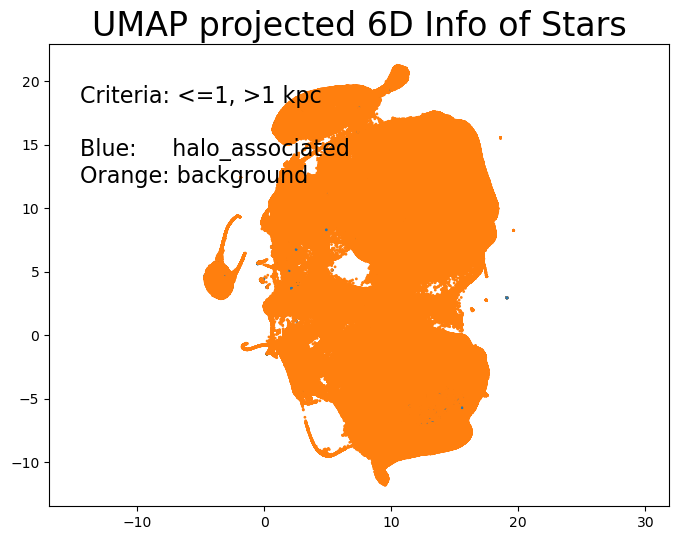

In [156]:
import seaborn as sns

plt.figure(figsize=(8,6))
plt.scatter(
    embedding[:, 0],
    embedding[:, 1], s=1,
    c=[sns.color_palette()[x] for x in stars_umap.group.map({"halo_associated":0, "background":1})])
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projected 6D Info of Stars', fontsize=24)
plt.annotate('Criteria: <=1, >1 kpc \n\nBlue:     halo_associated\nOrange: background',
             xy=(0.05, 0.70), xycoords='axes fraction', fontsize=16)
# plt.text(-8, 14, 'Criteria: <=1, >1 kpc', fontsize=16)

### Visual Inspection of Phase Space

Text(0.5, 0, 'distance from galactic center')

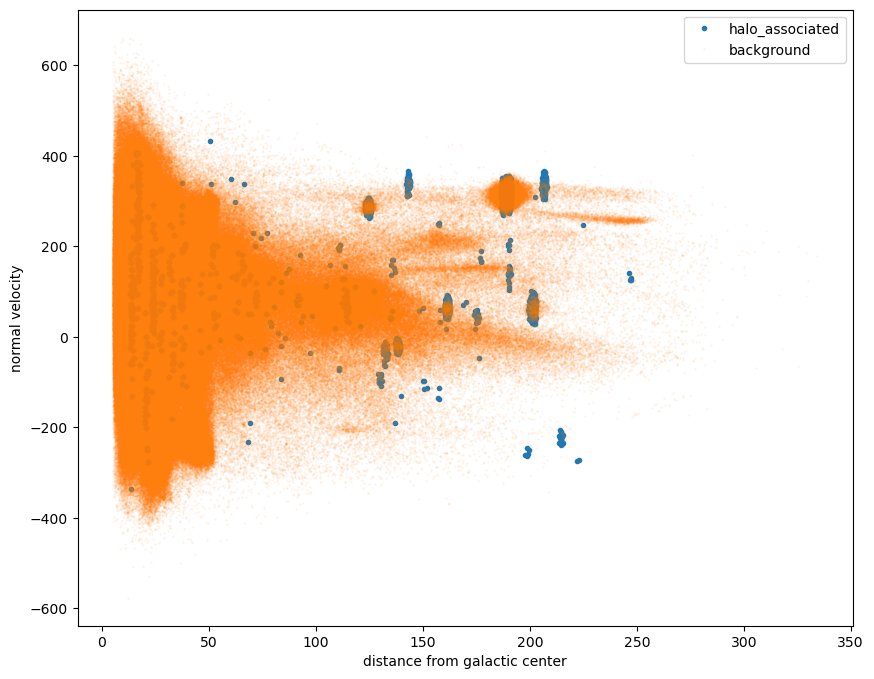

In [568]:
selector = df_star_sel['group'] == 'halo_associated'
r0 = df_star_sel['r'][selector]
vn0 = df_star_sel['v_theta'][selector]
r1 = df_star_sel['r'][~selector]
vn1 = df_star_sel['v_theta'][~selector]

plt.figure(figsize=(10,8))
plt.plot(r0, vn0, 'o', label='halo_associated', markersize=3)
plt.plot(r1, vn1, '.', label='background', markersize=1, alpha=0.1)
plt.legend()
plt.ylabel('normal velocity')
plt.xlabel('distance from galactic center')

Text(0.5, 0, 'distance from galactic center')

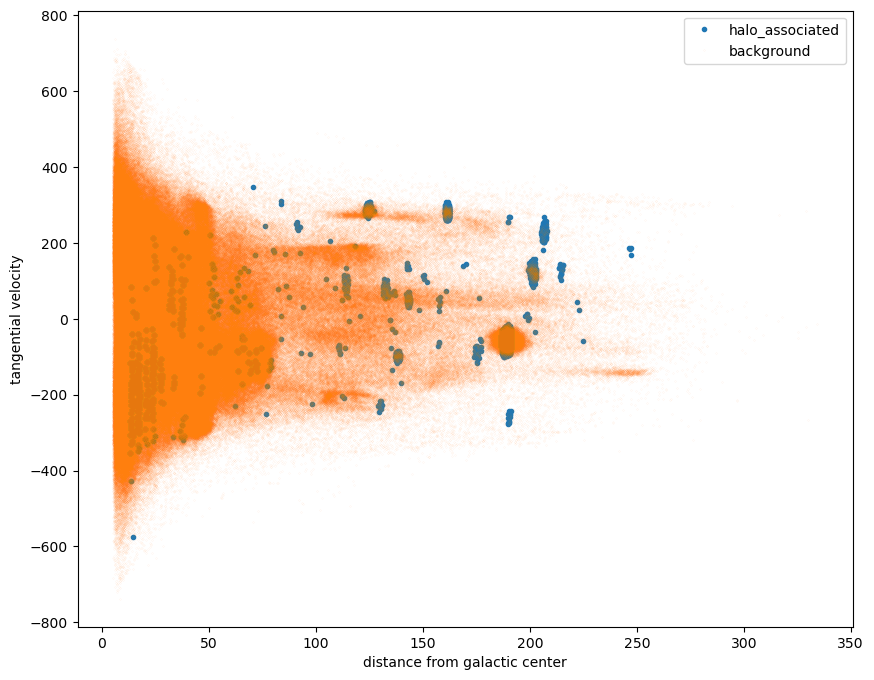

In [564]:
selector = df_star_sel['group'] == 'halo_associated'
r0 = df_star_sel['r'][selector]
vt0 = df_star_sel['v_phi'][selector]
r1 = df_star_sel['r'][~selector]
vt1 = df_star_sel['v_phi'][~selector]

plt.figure(figsize=(10,8))
plt.plot(r0, vt0, 'o', label='halo_associated', markersize=3)
plt.plot(r1, vt1, '.', label='background', markersize=.1, alpha=0.5)
plt.legend()
plt.ylabel('tangential velocity')
plt.xlabel('distance from galactic center')

Text(0, 0.5, 'stars count')

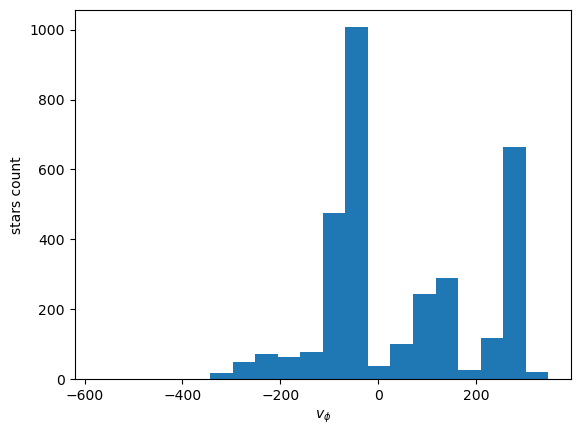

In [209]:
vphi = np.array(df_star_sel['v_phi'][selector])
plt.hist(vphi, bins=20)
plt.xlabel(r'$v_{\phi}$')
plt.ylabel('stars count')

Text(0, 0.5, 'stars count')

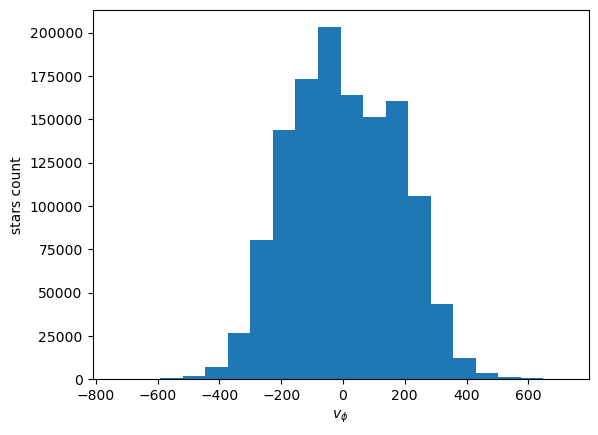

In [221]:
vphi = np.array(df_star_sel['v_phi'])
plt.hist(vphi, bins=20)
plt.xlabel(r'$v_{\phi}$')
plt.ylabel('stars count')

In [222]:
np.mean(vphi), np.median(vphi)

(3.2981312326321888, -6.694068516729426)

The mean and median disagree, possibly due to the inclusion of bulge stars that are in unordered motion.

Text(0, 0.5, 'stars count')

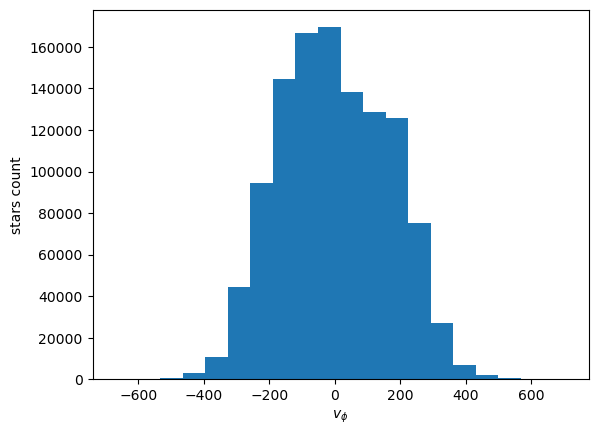

In [225]:
vphi = np.array(df_star_sel['v_phi'][df_star_sel['r']>10])
plt.hist(vphi, bins=20)
plt.xlabel(r'$v_{\phi}$')
plt.ylabel('stars count')

In [226]:
np.mean(vphi), np.median(vphi)

(-0.20338805055657386, -11.980337477467206)

Looking at the disk stars only, we get a consistent sign.

#### Tangential Velocity Plot

Text(0.5, 0, 'distance from galactic center')

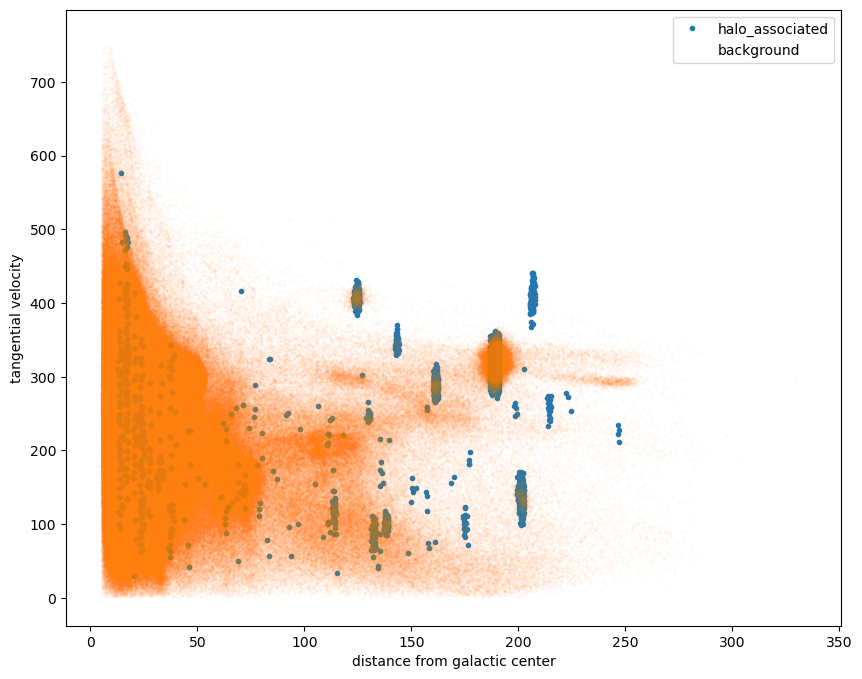

In [204]:
selector = df_star_sel['group'] == 'halo_associated'
r0 = df_star_sel['r'][selector]
vp0 = np.array(df_star_sel['v_phi'][selector])
vt0 = np.array(df_star_sel['v_theta'][selector])
vt0 = np.linalg.norm(np.column_stack((vp0, vt0)), axis=1)

r1 = df_star_sel['r'][~selector]
vp1 = np.array(df_star_sel['v_phi'][~selector])
vt1 = np.array(df_star_sel['v_theta'][~selector])
vt1 = np.linalg.norm(np.column_stack((vp1, vt1)), axis=1)

plt.figure(figsize=(10,8))
plt.plot(r0, vt0, 'o', label='halo_associated', markersize=3)
plt.plot(r1, vt1, '.', label='background', markersize=.1, alpha=0.5)
plt.legend()
plt.ylabel('tangential velocity')
plt.xlabel('distance from galactic center')

### Subhalo Virial Radii

In [157]:
r_vir = rockstar600.r['halos', 'virial_radius']
r_vir

YTArray([5.86533451, 2.59476972, 1.85012674, ..., 1.66140401, 1.68736756,
         1.68736756]) kpccm/h

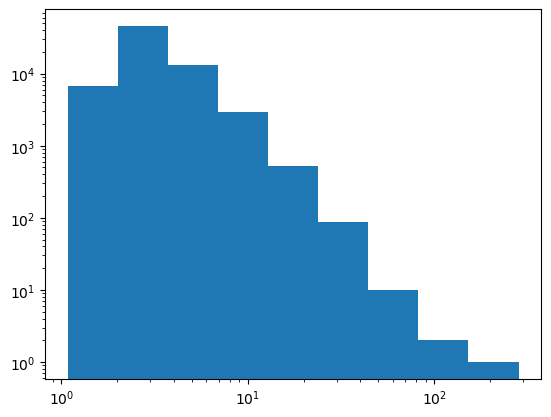

In [161]:
rvlist = r_vir.to('kpc').to_value()
plt.hist(rvlist, np.logspace(np.log10(min(rvlist)), np.log10(max(rvlist)), 10))
plt.yscale('log')
plt.xscale('log')

In [162]:
min(rvlist) # kpc

1.0807909519133174

In [163]:
np.median(rvlist)

2.7790177392587254

The choice of 1kpc of Bazarov et al. has the same order of magnitude as the halos' typical virial radii.

### Save DF

In [374]:
pwd

'/home/dhhyun'

In [375]:
df_star_sel.to_csv('df_star_sel.csv')

## Decision Tree

Please refer to 'm12f_7100.ipynb' for Decision Tree and Random Forest models if interested.

## MLP

### df_star_sel Initialization

In [2]:
df_star_sel = pd.read_csv('df_star_sel.csv', index_col=0)
df_star_sel

m          x          y          z  central_distance  \
7         5142.776739 -51.498462  35.836957  -8.309315         63.288417   
8         4939.851807 -51.857356  35.948586  -8.611626         63.683956   
21        5469.606559 -50.211011  35.564571  -5.088293         61.740385   
35        5968.481651 -48.993296  34.972928 -15.105963         62.061573   
36        4819.924339 -47.318390  33.865275 -14.549997         59.979908   
...               ...        ...        ...        ...               ...   
15775191  5457.901026 -61.768705 -71.191541  79.553575        123.338476   
15775192  5211.407880 -63.499997 -72.727044  79.136690        124.836246   
15775193  4751.189957 -64.309226 -67.793243  78.902700        122.299781   
15775194  4668.739064 -63.412972 -66.873470  79.937979        121.997321   
15775195  4845.550842 -69.208002 -67.423529  78.960524        124.781586   

                  vx          vy          vz  vertical_distance  \
7        -258.404358  242.893997   -1.681878          -5.349243   
8        -258.024841  242.313507    6.102988          -5.276609   
21       -106.118385  126.164398   22.475983          -5.638754   
35        -83.044243   83.387238   81.871582          -6.123241   
36       -269.813049  217.759888  -15.518835          -5.988330   
...              ...         ...         ...                ...   
15775191 -114.198151  178.095352   49.017944          95.580382   
15775192 -174.612915  167.309341   82.023315          97.761203   
15775193 -223.646942  153.389313  134.578781          93.899642   
15775194 -143.257889  166.792633   63.370174          92.694163   
15775195 -116.777618  194.022537  107.463699          96.047242   

          radial_distance  ...      z_rot           r     theta       phi  \
7               63.061948  ...  -5.349243   63.288417  1.702469  2.533634   
8               63.464980  ...  -5.276609   63.683956  1.706436  2.535431   
21              61.482352  ...  -5.638754   61.740385  1.653304  2.525316   
35              61.758763  ...  -6.123241   62.061573  1.816669  2.521644   
36              59.680225  ...  -5.988330   59.979908  1.815822  2.520414   
...                   ...  ...        ...         ...       ...       ...   
15775191        77.953642  ...  95.580382  123.338476  0.869770 -2.285443   
15775192        77.632696  ...  97.761203  124.836246  0.884180 -2.288565   
15775193        78.358750  ...  93.899642  122.299781  0.869566 -2.329827   
15775194        79.316697  ...  92.694163  121.997321  0.856291 -2.329640   
15775195        79.657839  ...  96.047242  124.781586  0.885645 -2.369254   

                 v_r     v_theta       v_phi  dist_to_closest_subhalo  \
7         348.025513   44.395679  -51.772585                13.706301   
8         346.064513   53.389744  -52.142008                14.026253   
21        157.124544   35.546220  -41.618275                12.374831   
35         92.620242  107.653253  -19.621455                15.066513   
36        339.570656   68.912973  -20.051331                14.757757   
...              ...         ...         ...                      ...   
15775191  -13.989616   75.952282 -202.971605                21.707833   
15775192   43.345260   70.527596 -241.571846                19.412699   
15775193  119.398676   75.319447 -267.821996                23.186499   
15775194   24.558654   62.585613 -218.719678                23.072850   
15775195   27.934022  115.955833 -220.463464                21.801457   

          closest_subhalo       group  
7                    1245  background  
8                    1245  background  
21                   1245  background  
35                  16456  background  
36                   1245  background  
...                   ...         ...  
15775191             2316  background  
15775192             2316  background  
15775193             2316  background  
15775194            16960  background  
15775195             2316  background  

[1279853 rows x 22 

In [3]:
X = np.column_stack((df_star_sel['r'], df_star_sel['theta'], df_star_sel['phi'], df_star_sel['v_r'], df_star_sel['v_theta'], df_star_sel['v_phi']))
print(np.shape(X))
y = np.array(df_star_sel['group'] == 'halo_associated').astype('int')

mask = df_star_sel['theta'] <= np.pi/2
X_train = X[mask]
X_test = X[~mask]
y_train = y[mask]
y_test = y[~mask]
print('len train, test:', len(X_train), len(X_test))
print(f'signals: {np.sum(y_train)}, {np.sum(y_test)}')

(1279853, 6)
len train, test: 621811 658042
signals: 666, 2607


In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

In [57]:
df_star_sel.columns

Index(['m', 'x', 'y', 'z', 'central_distance', 'vx', 'vy', 'vz',
       'vertical_distance', 'radial_distance', 'x_rot', 'y_rot', 'z_rot', 'r',
       'theta', 'phi', 'v_r', 'v_theta', 'v_phi', 'dist_to_closest_subhalo',
       'closest_subhalo', 'group'],
      dtype='object')

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# ANN module
import torch
from torch import nn, optim                        
from torch.utils.data import DataLoader, Dataset  
import torch.nn.functional as F  

# Loss
from sklearn.metrics import mean_squared_error


# to ndarray
y_train = y_train.reshape((-1,1))
y_test = y_test.reshape((-1,1))

# Data Scaling
# sklearn MinMaxScaler 
# (X-min(X))/(max(X)-min(X))
scaler = MinMaxScaler() 
scaler.fit(X_train) 
X_train = scaler.transform(X_train)
scaler.fit(X_test) 
X_test = scaler.transform(X_test)

scaler.fit(y_train)
y_train = scaler.transform(y_train)
scaler.fit(y_test)
y_test = scaler.transform(y_test)

In [7]:
# Interit torch Dataset
class TensorData(Dataset):

    def __init__(self, x_data, y_data):
        self.x_data = torch.FloatTensor(x_data)
        self.y_data = torch.FloatTensor(y_data)
        self.len = self.y_data.shape[0]

    def __getitem__(self, index):

        return self.x_data[index], self.y_data[index] 

    def __len__(self):
        return self.len

In [8]:
# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5)
trainsets = TensorData(X_train, y_train)
trainloader = torch.utils.data.DataLoader(trainsets, batch_size=32, shuffle=True)

testsets = TensorData(X_test, y_test)
testloader = torch.utils.data.DataLoader(testsets, batch_size=32, shuffle=False)

### Regressor

In [9]:
class Regressor(nn.Module):
    def __init__(self):
        super().__init__() # 모델 연산 정의
        self.fc1 = nn.Linear(6, 6, bias=True) # 입력층(13) -> 은닉층1(50)으로 가는 연산     # 6631? # insignificant
        self.fc2 = nn.Linear(6, 3, bias=True) # 은닉층1(50) -> 은닉층2(30)으로 가는 연산
        self.fc3 = nn.Linear(3, 1, bias=True) # 은닉층2(30) -> 출력층(1)으로 가는 연산
        self.dropout = nn.Dropout(0.2) # 연산이 될 때마다 20%의 비율로 랜덤하게 노드를 없앤다.

    def forward(self, x): # 모델 연산의 순서를 정의
        # x = F.relu(self.fc1(x)) # Linear 계산 후 활성화 함수 ReLU를 적용한다.   ######## no need for this layer
        x = self.dropout(F.relu(self.fc2(x))) # 은닉층2에서 드랍아웃을 적용한다.(즉, 30개의 20%인 6개의 노드가 계산에서 제외된다.)
        x = self.fc3(x) # F.relu(self.fc3(x)) # Linear 계산 후 활성화 함수 ReLU를 적용한다.  
      
        # return x  
        m = torch.nn.Sigmoid()   # Why?
        return m(x)
    # 
# 주의 사항
# 드랍아웃은 과적합(overfitting)을 방지하기 위해 노드의 일부를 배제하고 계산하는 방식이기 때문에 절대로 출력층에 사용해서는 안 된다.

#### Modified Entropy Loss

In [10]:
model = Regressor()
# def my_loss(output, target):
#     loss = torch.mean((output - target)**2)
#     return loss

# 
# criterion = nn.BCELoss() # MSELoss() # for classification, use cross entropy. BCELoss

alpha = 0.25
gamma = 2.0

def mod_entropy(output, target):
    loss = torch.sum(-target*alpha*(1-output)**gamma*torch.log(output) - (1-target)*(1-alpha)*output**gamma*torch.log(1-output))
    return loss

# criterion = mod_entropy() # wrong syntax?

optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-7)

In [11]:
from tqdm import tqdm
from time import time

start_time = time()


loss_ = [] # loss를 저장할 리스트.
n = len(trainloader)

for epoch in tqdm(range(200)): #400

  running_loss = 0.0 # 한 에폭이 돌 때 그안에서 배치마다 loss가 나온다. 즉 한번 학습할 때 그렇게 쪼개지면서 loss가 다 나오니 MSE를 구하기 위해서 사용한다.

  for i, data in enumerate(trainloader): # 무작위로 섞인 32개의 데이터가 담긴 배치가 하나씩 들어온다.
    
    inputs, values = data # data에는 X, Y가 들어있다.

    optimizer.zero_grad() # 최적화 초기화.

    outputs = model(inputs) # 모델에 입력값을 넣어 예측값을 산출한다.
    # loss = criterion(outputs, values) # 손실함수를 계산. error 계산.
    loss = mod_entropy(outputs, values) # modified entropy loss function for class imbalance issue
    loss.backward() # 손실 함수를 기준으로 역전파를 설정한다.
    optimizer.step() # 역전파를 진행하고 가중치를 업데이트한다.

    running_loss += loss.item() # epoch 마다 평균 loss를 계산하기 위해 배치 loss를 더한다.
  
  loss_.append(running_loss/n) # MSE(Mean Squared Error) 계산
print((time() - start_time)/60, 'min')

100%|█████████████████████████████████████████████████████████████████████████████████| 200/200 [50:05<00:00, 15.03s/it]

50.085951232910155 min


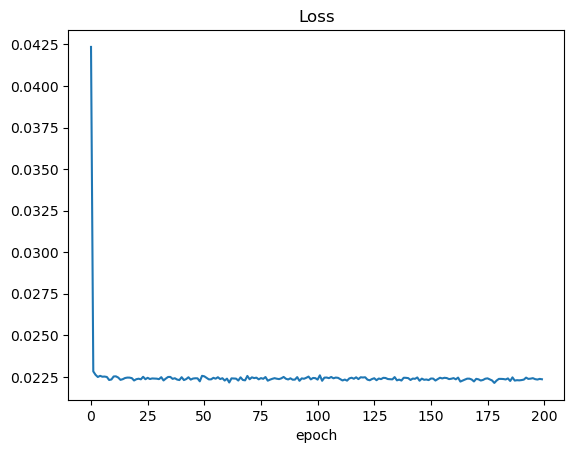

In [12]:
plt.plot(loss_)
plt.title('Loss')
plt.xlabel('epoch')
plt.show()

In [13]:
def evaluation(dataloader):

  predictions = torch.tensor([], dtype=torch.float) # 예측값을 저장하는 텐서.
  actual = torch.tensor([], dtype=torch.float) # 실제값을 저장하는 텐서.

  with torch.no_grad():
    model.eval() # 평가를 할 땐 반드시 eval()을 사용해야 한다.

    for data in dataloader:
      inputs, values = data
      outputs = model(inputs)

      predictions = torch.cat((predictions, outputs), 0) # cat함수를 통해 예측값을 누적.
      actual = torch.cat((actual, values), 0) # cat함수를 통해 실제값을 누적.

  predictions = predictions.numpy() # 넘파이 배열로 변경.
  actual = actual.numpy() # 넘파이 배열로 변경.
  rmse = np.sqrt(mean_squared_error(predictions, actual)) # sklearn을 이용해 RMSE를 계산.

  return rmse

In [14]:
train_rmse = evaluation(trainloader) # 비교를 위해서 train을 넣어서 본다. 
test_rmse = evaluation(testloader)

print(f'train rmse:{train_rmse}')
print(f'test rmse:{test_rmse}')

train rmse:0.044930391013622284
test rmse:0.0747360810637474


### ROC

In [15]:
def y_predict(dataloader):

  predictions = torch.tensor([], dtype=torch.float) # 예측값을 저장하는 텐서.
  actual = torch.tensor([], dtype=torch.float) # 실제값을 저장하는 텐서.

  with torch.no_grad():
    model.eval() # 평가를 할 땐 반드시 eval()을 사용해야 한다.

    for data in dataloader:
      inputs, values = data
      outputs = model(inputs)

      predictions = torch.cat((predictions, outputs), 0) # cat함수를 통해 예측값을 누적.
      actual = torch.cat((actual, values), 0) # cat함수를 통해 실제값을 누적.

  predictions = predictions.numpy() # 넘파이 배열로 변경.
  actual = actual.numpy() # 넘파이 배열로 변경.
  # rmse = np.sqrt(mean_squared_error(predictions, actual)) # sklearn을 이용해 RMSE를 계산.

  return predictions, actual

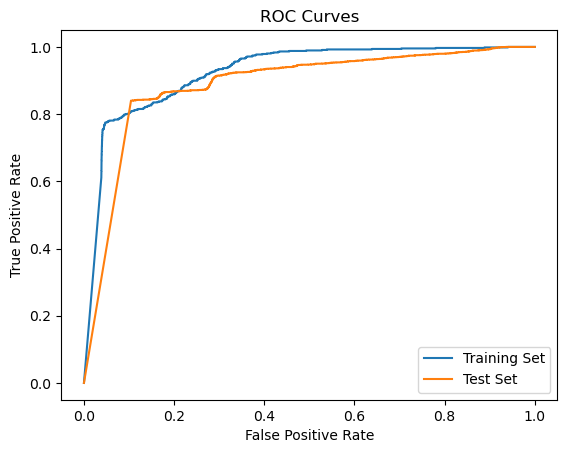

In [22]:
from sklearn.metrics import roc_curve, RocCurveDisplay, roc_auc_score

y_pred1, y_train = y_predict(trainloader) # continuous values from 0 to 1?
y_pred2, y_test = y_predict(testloader) # continuous values from 0 to 1?

# Compute the false positive rate and true positive rate for each curve
fpr1, tpr1, _ = roc_curve(y_train, y_pred1)
fpr2, tpr2, _ = roc_curve(y_test, y_pred2)

auc1 = roc_auc_score(y_train, y_pred1)
auc2 = roc_auc_score(y_test, y_pred2)

# Plot the ROC curves on the same figure
fig, ax = plt.subplots()
RocCurveDisplay(fpr=fpr1, tpr=tpr1).plot(ax=ax, label='Training Set')
RocCurveDisplay(fpr=fpr2, tpr=tpr2).plot(ax=ax, label='Test Set')

# Set the plot title and axis labels
plt.title('ROC Curves')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

ax.annotate(f'{auc1}', xy=(5, 0), xytext=(4, 2), fontsize=12,
             arrowprops=dict(facecolor='black', arrowstyle='->'))

plt.legend()
plt.show()

(array([117939., 102652.,  71645.,  65919.,  61227.,  52636.,  49881.,
         23942.,  18720.,  93481.]),
 array([0.00048144, 0.00946989, 0.01845833, 0.02744677, 0.03643521,
        0.04542365, 0.0544121 , 0.06340054, 0.07238898, 0.08137742,
        0.09036586], dtype=float32),
 <BarContainer object of 10 artists>)

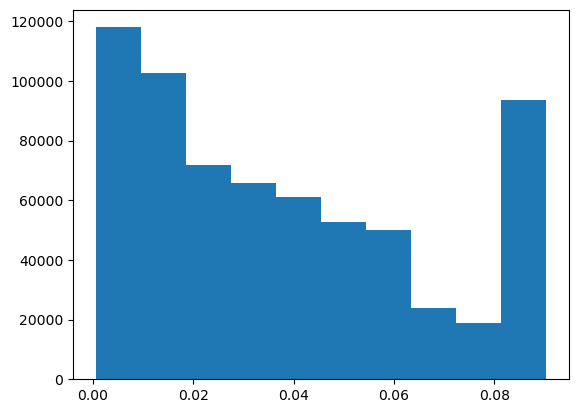

In [44]:
plt.hist(y_pred2)

The model output is significantly skewed, every y being below ~0.1, while they are expected to occupy [0, 1].

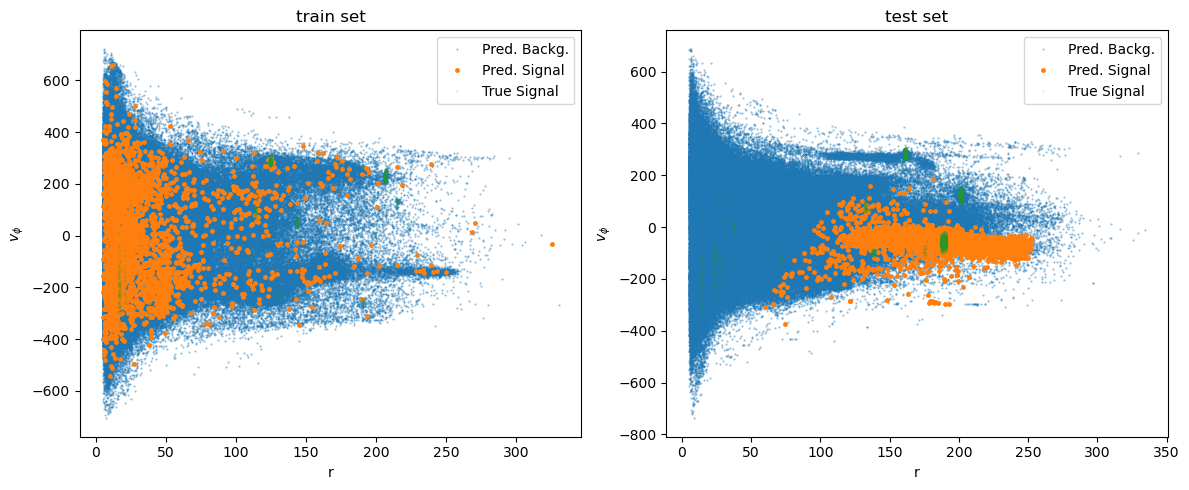

In [279]:
# y_pred_train = clf.predict(X_train)
trainloader_check = torch.utils.data.DataLoader(trainsets, batch_size=32, shuffle=True)
y_pred_train, y_train = y_predict(trainloader_check) # !!!!!!!!!!! trainloader: shuffled
y_pred, y_test = y_predict(testloader) # continuous values from 0 to 1?



fig, ax = plt.subplots(1,2, figsize=(12,5))

###
thresh = 0.05
###

mask2 = y_pred_train.reshape(-1) <= thresh
ax[0].plot(X_train[:,0][mask2], X_train[:,5][mask2], '.', ms=1, alpha=.5, label='Pred. Backg.')
mask2 = y_pred_train.reshape(-1) > thresh
ax[0].plot(X_train[:,0][mask2], X_train[:,5][mask2], '.', ms= 5, label='Pred. Signal')
### =================
y_train = y[mask] ###???
mask2 = y_train == 1
ax[0].plot(X_train[:,0][mask2], X_train[:,5][mask2], '.', ms= 2, alpha=.1, label='True Signal')
ax[0].legend()
ax[0].set_title('train set')
ax[0].set_xlabel('r')
ax[0].set_ylabel(r'$v_{\phi}$')

###
thresh = 0.05
###

mask2 = y_pred.reshape(-1) <= thresh
ax[1].plot(X_test[:,0][mask2], X_test[:,5][mask2], '.', ms=1, alpha=.5, label='Pred. Backg.')
mask2 = y_pred.reshape(-1) > thresh
ax[1].plot(X_test[:,0][mask2], X_test[:,5][mask2], '.', ms= 5, label='Pred. Signal')
mask2 = y_test.reshape(-1) == 1
ax[1].plot(X_test[:,0][mask2], X_test[:,5][mask2], '.', ms= 2, alpha=.1, label='True Signal')
ax[1].legend()
ax[1].set_title('test set')
ax[1].set_xlabel('r')
ax[1].set_ylabel(r'$v_{\phi}$')
plt.tight_layout()

# tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
# print(f'tn, fp, fn, tp\n{tn, fp, fn, tp}')

Visually inspecting a projection of the phase space suggests that the model might be overfitted on the training set, and just casting middle-range guesses on the test set.

## DM halo
Refer to DMGNN.ipynb for more details

In [27]:
import os
import yt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

path_rockstar = '/data1/shared/FIRE2/m12f_res7100/rockstar_particle'
path = os.path.join(path_rockstar, 'halos_0.0.bin')
ds = yt.load(path)
halo_masses = ds.r['halos', 'particle_mass']
idx_host = np.where(halo_masses == max(halo_masses))[0]
print(idx_host)

halo_id = ds.r['halos', 'particle_identifier']
halo_x = ds.r['halos', 'particle_position_x']
halo_y = ds.r['halos', 'particle_position_y']
halo_z = ds.r['halos', 'particle_position_z']
x = halo_x[idx_host].to("Mpc")[0]
y = halo_y[idx_host].to("Mpc")[0]
z = halo_z[idx_host].to("Mpc")[0]
cen_host = yt.units.yt_array.YTArray([x, y, z])
halo_vx = ds.r['halos', 'particle_velocity_x']
halo_vy = ds.r['halos', 'particle_velocity_y']
halo_vz = ds.r['halos', 'particle_velocity_z']
vx = halo_vx[idx_host].to("km/s")[0]
vy = halo_vy[idx_host].to("km/s")[0]
vz = halo_vz[idx_host].to("km/s")[0]
cen_host_vel = yt.units.yt_array.YTArray([vx, vy, vz])

print(halo_masses[idx_host], halo_id[idx_host], '\ncenter:\n', cen_host)
print('\ndomain width', ds.domain_width.in_units("Mpc"))



# field subhalo selection
df_txt = pd.read_table(os.path.join(path_rockstar, 'host_subhalo.txt'), delimiter=' ', header=None, skiprows=np.arange(0,16))
df_txt_sorted = df_txt.sort_values(by=2, ascending=False)
# df_txt_sorted.head(10)
id_field_list = np.array(df_txt_sorted[0][1:9]) # top 8 massive halos except the host
### Alternative search
# search_radius = cen_host[0]/np.array(cen_host[0])*5
# print(search_radius)
# sph = ds.sphere(cen_host, search_radius)
# rad_from_host = sph['halos', 'particle_spherical_position_radius'].to('Mpc')
# print(np.sum(rad_from_host > 2))
# halo_id[np.where(rad_from_host > 2)]



# corresponding DM particles 
def load_df(path):
    header = 'x y z vx vy vz mass specific_energy particle_id type assigned_internal_haloid internal_haloid external_haloid'.split(' ')
    header2 = 'id internal_id num_p mvir mbound_vir rvir vmax rvmax vrms x y z vx vy vz Jx Jy Jz energy spin Type SM Gas BH'.split(' ')
    df = pd.read_table(path) #temporary df

    index_header = np.arange(len(df))[df.iloc[:,0].str.startswith('#Particle')][-1]
    index_header += 1
    index_header2 = np.arange(len(df))[df.iloc[:,0].str.startswith('#Halo')][-1]
    index_header2 += 1

    df = pd.read_table(path, header = index_header, delimiter=' ', names = header)
    
    return_df2 = False
    if return_df2:
        df2 = pd.read_table(path, header = index_header2,
                            nrows = index_header-index_header2-1,
                            delimiter=' ', names = header2, index_col=False)

        df2['id'] = df2['id'].str.replace('#', '').astype(int)
        
    return df


path = os.path.join(path_rockstar, 'halos_0.0.particles')
df = load_df(path)

# Unable to do ds = yt.load(halos_0.0.particles)
# ID_DM_min = int(np.min(ds.all_data()['PartType1','particle_index']))
# ID_DM_max = int(np.max(ds.all_data()['PartType1','particle_index']))
# ID_Star_min = int(np.min(ds.all_data()['PartType4','particle_index']))
# ID_Star_max = int(np.max(ds.all_data()['PartType4','particle_index']))
# assert ID_Star_max < ID_DM_min, 'particle_index is shuffled'
# 
# df1 = df[df['particle_id'] >= ID_DM_min]
# df_Star = df[df['particle_id'] <= ID_Star_max]

/home/dhhyun/anaconda3/envs/yttest2/lib/python3.9/_collections_abc.py:769: MatplotlibDeprecationWarning: The global colormaps dictionary is no longer considered public API.
  self[key]
yt : [INFO     ] 2023-08-03 15:55:07,498 Parameters: current_time              = 4.354556907576709e+17 s
yt : [INFO     ] 2023-08-03 15:55:07,499 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2023-08-03 15:55:07,501 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2023-08-03 15:55:07,502 Parameters: domain_right_edge         = [60. 60. 60.]
yt : [INFO     ] 2023-08-03 15:55:07,503 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2023-08-03 15:55:07,504 Parameters: current_redshift          = 0.0
yt : [INFO     ] 2023-08-03 15:55:07,505 Parameters: omega_lambda              = 0.7279999852180481
yt : [INFO     ] 2023-08-03 15:55:07,506 Parameters: omega_matter              = 0.2720000147819519
yt : [INFO     ] 2023-08-03 15:55:07,506 Parameters: omega_radiati

[16243]
[9.00138009e+11] Msun/h [16243.] dimensionless 
center:
 [38.71150045 47.66498862 46.81724554] Mpc

domain width [85.4700828 85.4700828 85.4700828] Mpc


In [459]:
ds.r['halos', 'virial_radius'][idx_host]

YTArray([199.22251892]) kpccm/h

18641
18641
mass 26622363648.0 Msun/h  ID: 18641.0 dimensionless 
Relative pos: [ 0.36489589 -1.48379221 -0.19193578] Mpc 
Virial R: 61.738548278808594 kpccm/h

domain width [85.4700828 85.4700828 85.4700828] Mpc
Number of particles: assigned_internal_haloid vs. external_haloid
assigned internal 30 [27.142067 33.464741 32.844673] 		internal 2397986 [29.05249  33.230087 33.065739]
assigned internal 24 [27.103443 33.480335 32.806301] 		internal 1191925 [27.450935 32.406986 32.815685]
assigned internal 24 [27.140791 33.477303 32.822906] 		internal 730166 [27.186398 33.985645 33.412312]
assigned internal 168 [27.148325 33.480804 32.881287] 		internal 511682 [25.740314 33.195858 33.518639]
assigned internal 2088 [27.102547 33.452251 32.812771] 		internal 454955 [28.109255 32.769272 32.174644]
assigned internal 74 [27.163279 33.422268 32.823265] 		internal 433771 [25.661404 34.228806 33.727215]
assigned internal 372 [27.158827 33.42564  32.846539] 		internal 285820 [28.422411 33.744934 32.45

yt : [INFO     ] 2023-08-03 16:04:11,497 Calculating time from 1.000e+00 to be 4.355e+17 seconds
yt : [INFO     ] 2023-08-03 16:04:11,499 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2023-08-03 16:04:11,516 Parameters: current_time              = 4.3545571088051386e+17 s
yt : [INFO     ] 2023-08-03 16:04:11,517 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2023-08-03 16:04:11,518 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2023-08-03 16:04:11,520 Parameters: domain_right_edge         = [60000. 60000. 60000.]
yt : [INFO     ] 2023-08-03 16:04:11,521 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2023-08-03 16:04:11,522 Parameters: current_redshift          = 0.0
yt : [INFO     ] 2023-08-03 16:04:11,523 Parameters: omega_lambda              = 0.728
yt : [INFO     ] 2023-08-03 16:04:11,523 Parameters: omega_matter              = 0.272
yt : [INFO     ] 2023-08-03 16:04:11,524 Parameters: omega_radiation           = 0.

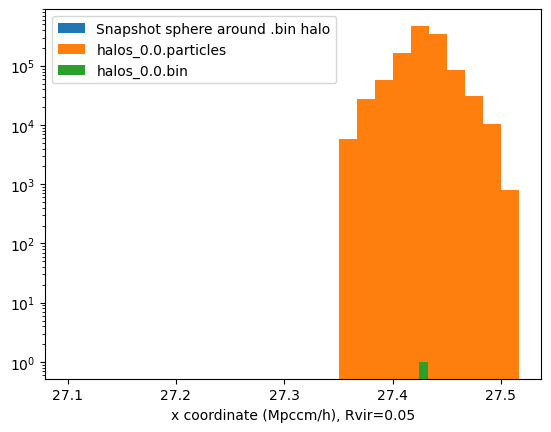

In [28]:
# Change id_field_list[#] to check other halos
idx = id_field_list[1] # int(halo_id[np.where(rad_from_host > 2)][2])
print(idx)
idx = np.where(halo_id==idx)[0][0]
print(idx)  # check if different
Rvir = ds.r['halos', 'virial_radius'][idx]
### field halo center
cen_coord = yt.units.yt_array.YTArray([halo_x[idx], halo_y[idx], halo_z[idx]])
print('mass', halo_masses[idx], ' ID:', halo_id[idx], 
      '\nRelative pos:', (cen_coord - cen_host).to('Mpc'),
     '\nVirial R:', Rvir)
print('\ndomain width', ds.domain_width.in_units("Mpc"))


print('Number of particles: assigned_internal_haloid vs. external_haloid')
for ID in id_field_list:
    coord1 = np.row_stack((df[df['external_haloid']==ID]['x'], df[df['external_haloid']==ID]['y'], df[df['external_haloid']==ID]['z'])).T
    coord2 = np.row_stack((df[df['assigned_internal_haloid']==ID]['x'], df[df['assigned_internal_haloid']==ID]['y'], df[df['assigned_internal_haloid']==ID]['z'])).T
    print('assigned internal', len(df[df['assigned_internal_haloid']==ID]), coord2[0,:],
          '\t\tinternal', len(df[df['external_haloid']==ID]), coord1[0,:])
    

    
# FIRE snapshot
ds_snapshot = yt.load('/data1/shared/FIRE2/m12f_res7100/snapdir_600/snapshot_600.0.hdf5')
sph_snapshot = ds_snapshot.sphere(cen_coord, (10, 'kpc'))
pos = sph_snapshot['PartType1', 'Coordinates']
vel = sph_snapshot['PartType1', 'Velocities']
# m = sph_snapshot['PartType1', 'particle_mass']



select_df = df[df['external_haloid']==idx]
plt.hist(np.array(pos.to('Mpccm/h')[:,0]), label='Snapshot sphere around .bin halo')
plt.hist(np.array(select_df['x']), label='halos_0.0.particles')
plt.hist(np.array([cen_coord[0]]), bins=np.arange(27.1, 27.45, 0.009), label='halos_0.0.bin')
plt.yscale('log')
plt.xlabel('x coordinate (Mpccm/h), Rvir=0.05')
plt.legend()

In [4]:
len(select_df)

1191925

### Manually selected field halo list

In [6]:
id_field_list2 = [53867, 60930, 60025, 58395,
                 29594, 53875, 67253, 70081] # deprecated

60930
60930
mass 518639.125 Msun/h  ID: 60930.0 dimensionless 
Relative pos: [-0.56199944 -2.59913466  0.05019424] Mpc 
Virial R: 1.661404013633728 kpccm/h

domain width [85.4700828 85.4700828 85.4700828] Mpc
Number of particles: assigned_internal_haloid vs. external_haloid
assigned internal 40 [27.067892 33.571743 33.049278] 		external 43 [26.883156 30.869049 32.964542]
assigned internal 24 [27.220348 33.317932 32.776096] 		external 33 [26.783039 31.635824 32.903584]
assigned internal 36 [27.269838 33.27737  32.842148] 		external 34 [26.850735 31.637869 32.95195 ]
assigned internal 22 [27.201731 33.386009 32.736359] 		external 36 [26.881496 31.652361 32.948963]
assigned internal 356 [27.107231 33.433167 32.902512] 		external 396 [26.901192 31.732523 32.927505]
assigned internal 140 [27.073391 33.579277 33.08778 ] 		external 43 [26.901985 31.713974 32.939922]
assigned internal 52 [27.18243  33.410843 32.825935] 		external 27 [26.794151 31.532177 32.943119]
assigned internal 218 [27.273

yt : [INFO     ] 2023-07-06 20:41:31,225 Calculating time from 1.000e+00 to be 4.355e+17 seconds
yt : [INFO     ] 2023-07-06 20:41:31,226 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2023-07-06 20:41:31,239 Parameters: current_time              = 4.3545571088051386e+17 s
yt : [INFO     ] 2023-07-06 20:41:31,239 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2023-07-06 20:41:31,240 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2023-07-06 20:41:31,240 Parameters: domain_right_edge         = [60000. 60000. 60000.]
yt : [INFO     ] 2023-07-06 20:41:31,241 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2023-07-06 20:41:31,241 Parameters: current_redshift          = 0.0
yt : [INFO     ] 2023-07-06 20:41:31,241 Parameters: omega_lambda              = 0.728
yt : [INFO     ] 2023-07-06 20:41:31,242 Parameters: omega_matter              = 0.272
yt : [INFO     ] 2023-07-06 20:41:31,242 Parameters: omega_radiation           = 0.

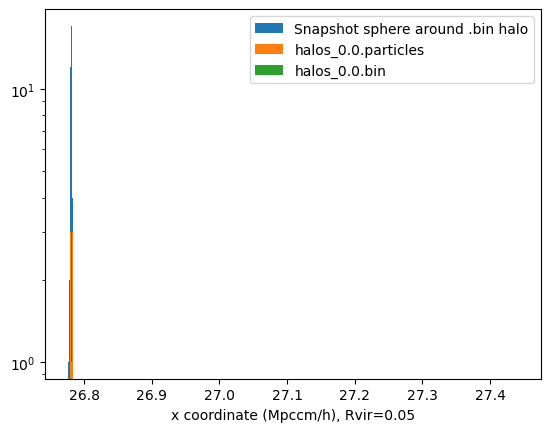

In [8]:
# Change id_field_list[#] to check other halos
idx = id_field_list2[1] # int(halo_id[np.where(rad_from_host > 2)][2])
print(idx)
idx = np.where(halo_id==idx)[0][0]
print(idx)  # check if different
Rvir = ds.r['halos', 'virial_radius'][idx]
### field halo center
cen_coord = yt.units.yt_array.YTArray([halo_x[idx], halo_y[idx], halo_z[idx]])
print('mass', halo_masses[idx], ' ID:', halo_id[idx], 
      '\nRelative pos:', (cen_coord - cen_host).to('Mpc'),
     '\nVirial R:', Rvir)
print('\ndomain width', ds.domain_width.in_units("Mpc"))


print('Number of particles: assigned_internal_haloid vs. external_haloid')
for ID in id_field_list2:
    coord1 = np.row_stack((df[df['external_haloid']==ID]['x'], df[df['external_haloid']==ID]['y'], df[df['external_haloid']==ID]['z'])).T
    coord2 = np.row_stack((df[df['assigned_internal_haloid']==ID]['x'], df[df['assigned_internal_haloid']==ID]['y'], df[df['assigned_internal_haloid']==ID]['z'])).T
    print('assigned internal', len(df[df['assigned_internal_haloid']==ID]), coord2[0,:],
          '\t\texternal', len(df[df['external_haloid']==ID]), coord1[0,:])
    

    
# FIRE snapshot
ds_snapshot = yt.load('/data1/shared/FIRE2/m12f_res7100/snapdir_600/snapshot_600.0.hdf5')
sph_snapshot = ds_snapshot.sphere(cen_coord, (10, 'kpc'))
pos = sph_snapshot['PartType1', 'Coordinates']
vel = sph_snapshot['PartType1', 'Velocities']
# m = sph_snapshot['PartType1', 'particle_mass']


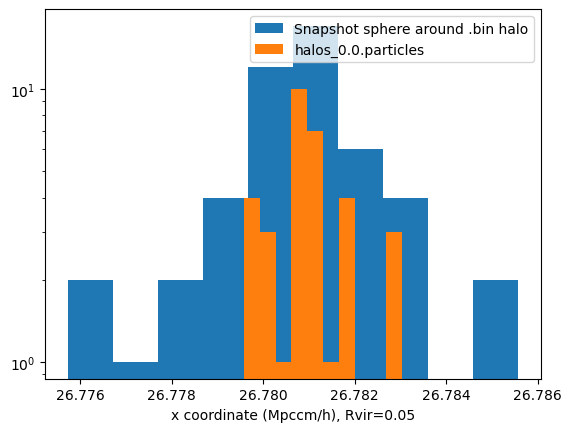

In [11]:
select_df = df[df['external_haloid']==idx]
plt.hist(np.array(pos.to('Mpccm/h')[:,0]), label='Snapshot sphere around .bin halo')
plt.hist(np.array(select_df['x']), label='halos_0.0.particles')
# plt.hist(np.array([cen_coord[0]]), label='halos_0.0.bin') #, bins=np.arange(27.1, 27.45, 0.009)
plt.yscale('log')
plt.xlabel('x coordinate (Mpccm/h), Rvir=0.05')
plt.legend()

### id_field_list

In [15]:
select_halo = df_txt_sorted[12:22]
id_field_list = np.array(select_halo[0]) # top 8 massive halos except the host
select_halo 

0   1             2      3      4       5      6       7         8   \
41067  20329  -1  3.917000e+09  29.69  28.22  32.597  2.149  118466  27.05016   
37587  20480  -1  3.297000e+09  24.67  27.96  30.779  9.588   64371  28.52060   
33659  20418  -1  3.240000e+09  25.99  25.00  30.599  2.624   83937  28.25872   
65336  20665  -1  3.034000e+09  29.21  27.37  29.937  1.499   88903  27.08624   
23584  20851  -1  2.815000e+09  25.56  24.84  29.197  2.179   75569  26.65244   
62882   5882  -1  2.805000e+09  31.63  28.33  29.164  1.255   87495  27.04490   
27683  20517  -1  2.691000e+09  25.75  26.64  28.763  2.323   59591  28.29485   
20477  20900  -1  2.457000e+09  24.23  23.43  27.903  2.153   66721  26.08064   
15258  20986  -1  2.347000e+09  25.87  24.19  27.479  1.659   60813  25.09062   
15422  20704  -1  2.296000e+09  26.89  25.44  27.279  1.301   68415  25.04455   

             9   ...       24     25       26       27       28       29  \
41067  33.69611  ...  0.29554   0.35  0.02862  0.91188  0.71557 -0.04803   
37587  33.20554  ...  7.31411  15.26  0.15123  0.16066  0.11406  3.57001   
33659  33.23769  ...  3.29433   3.21  0.06856  0.58304  0.51803 -0.57434   
65336  33.97123  ...  0.71719   0.55  0.01339  0.78273  0.68054  0.74564   
23584  33.79700  ...  1.08060   0.87  0.04771  0.96825  0.77087 -0.58037   
62882  33.62358  ...  0.27603   0.52  0.02258  0.98378  0.71026  0.46255   
27683  32.47649  ...  1.46862   3.02  0.03751  0.87671  0.62634 -0.10318   
20477  34.02677  ...  0.16880   0.70  0.03893  0.86975  0.71464  0.78979   
15258  34.33287  ...  0.63185   0.65  0.02410  0.90855  0.72685  0.80001   
15422  34.51627  ...  0.69432   0.59  0.03215  0.78891  0.55159  0.89106   

            30       31      32  33  
41067 -0.22928  1.02793  0.8239  -1  
37587 -1.31493 -1.54623  0.0314  -1  
33659 -0.75592  0.81400  0.9251  -1  
65336  0.38185  0.42125  0.7281  -1  
23584  0.63375  0.64836  0.9341  -1  
62882  0.00373  0.93783  0.9149  -1  
27683  1.23439 -1.11747  0.8118  -1  
20477 -0.16595  0.76367  0.8278  -1  
15258 -0.51286  0.17225  0.8920  -1  
15422 -0.16099 -0.47107  0.8070  -1  

[10 rows x 34 columns]

In [17]:
# Change id_field_list[#] to check other halos
idx = id_field_list[1] # int(halo_id[np.where(rad_from_host > 2)][2])
print(idx)
idx = np.where(halo_id==idx)[0][0]
print(idx)  # check if different
Rvir = ds.r['halos', 'virial_radius'][idx]
### field halo center
cen_coord = yt.units.yt_array.YTArray([halo_x[idx], halo_y[idx], halo_z[idx]])
print('mass', halo_masses[idx], ' ID:', halo_id[idx], 
      '\nRelative pos:', (cen_coord - cen_host).to('Mpc'),
     '\nVirial R:', Rvir)
print('\ndomain width', ds.domain_width.in_units("Mpc"))


print('Number of particles: assigned_internal_haloid vs. external_haloid')
for ID in id_field_list:
    coord1 = np.row_stack((df[df['external_haloid']==ID]['x'], df[df['external_haloid']==ID]['y'], df[df['external_haloid']==ID]['z'])).T
    coord2 = np.row_stack((df[df['assigned_internal_haloid']==ID]['x'], df[df['assigned_internal_haloid']==ID]['y'], df[df['assigned_internal_haloid']==ID]['z'])).T
    print('assigned internal', len(df[df['assigned_internal_haloid']==ID]), coord2[0,:],
          '\t\texternal', len(df[df['external_haloid']==ID]), coord1[0,:])
    

    
# FIRE snapshot
ds_snapshot = yt.load('/data1/shared/FIRE2/m12f_res7100/snapdir_600/snapshot_600.0.hdf5')
sph_snapshot = ds_snapshot.sphere(cen_coord, (10, 'kpc'))
pos = sph_snapshot['PartType1', 'Coordinates']
vel = sph_snapshot['PartType1', 'Velocities']
# m = sph_snapshot['PartType1', 'particle_mass']


20480
20480
mass 3298421504.0 Msun/h  ID: 20480.0 dimensionless 
Relative pos: [ 1.91613542 -0.36364606  0.67463625] Mpc 
Virial R: 30.778669357299805 kpccm/h

domain width [85.4700828 85.4700828 85.4700828] Mpc
Number of particles: assigned_internal_haloid vs. external_haloid
assigned internal 26 [27.147533 33.451546 32.870415] 		external 171632 [27.048563 33.704826 32.448673]
assigned internal 24 [27.1584   33.461266 32.834869] 		external 151578 [28.527422 33.191303 33.38253 ]
assigned internal 33 [27.157419 33.447838 32.855957] 		external 165913 [28.262535 33.230911 32.731483]
assigned internal 154 [27.148438 33.466255 32.880413] 		external 134578 [27.088383 33.977604 33.425816]
assigned internal 36 [27.159857 33.463219 32.860695] 		external 123135 [26.664124 33.807674 33.414906]
assigned internal 44 [27.056896 33.430489 32.811729] 		external 138173 [27.058859 33.624081 33.10022 ]
assigned internal 34 [27.148493 33.472542 32.846718] 		external 150406 [28.293751 32.470951 31.969376]


yt : [INFO     ] 2023-07-07 13:54:22,306 Calculating time from 1.000e+00 to be 4.355e+17 seconds
yt : [INFO     ] 2023-07-07 13:54:22,307 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2023-07-07 13:54:22,320 Parameters: current_time              = 4.3545571088051386e+17 s
yt : [INFO     ] 2023-07-07 13:54:22,320 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2023-07-07 13:54:22,321 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2023-07-07 13:54:22,321 Parameters: domain_right_edge         = [60000. 60000. 60000.]
yt : [INFO     ] 2023-07-07 13:54:22,322 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2023-07-07 13:54:22,322 Parameters: current_redshift          = 0.0
yt : [INFO     ] 2023-07-07 13:54:22,323 Parameters: omega_lambda              = 0.728
yt : [INFO     ] 2023-07-07 13:54:22,323 Parameters: omega_matter              = 0.272
yt : [INFO     ] 2023-07-07 13:54:22,323 Parameters: omega_radiation           = 0.

### For 100 halos

In [114]:
from time import time

def cartesian_to_spherical_array(pos, vel):
    r = np.linalg.norm(pos, axis=1)
    theta = np.arccos(pos[:,2]/r)
    phi = np.arctan2(pos[:,1], pos[:,0])
    v_r = np.sum(pos*vel, axis=1)/r
    v_phi = (vel[:, 1] * pos[:, 0] - vel[:, 0] * pos[:, 1]) / (r * np.sin(theta))
    # indirectly # sign lost
#     v_theta = np.sqrt(np.sum(vel*vel, axis=1) - v_r**2 - v_phi**2) # (np.sum(vel*pos[:, :2], axis=1) * pos[:, 2] - v_r * r * np.sin(theta)) / (r * np.cos(theta))
    v_theta = (-vel[:,0]*pos[:,0]*pos[:,2] - vel[:,1]*pos[:,1]*pos[:,2] + vel[:,2]*(pos[:,0]**2 + pos[:,1]**2))/(r**2 * np.sin(theta))
    return np.column_stack((r, theta, phi)), np.column_stack((v_r, v_theta, v_phi))

def divide_lists(list1, list2):
    set1 = set(list1)
    set2 = set(list2)
    
    common_elements = list(set1.intersection(set2))
    list_with_common = [i for i, x in enumerate(list1) if x in common_elements]
    list_without_common = [i for i, x in enumerate(list1) if x not in common_elements]
    
    return list_with_common, list_without_common


start = time()


# FIRE snapshot
ds_snapshot = yt.load('/data1/shared/FIRE2/m12f_res7100/snapdir_600/snapshot_600.0.hdf5')

host_pos = np.array(cen_host.to("Mpccm/h"))
host_vel = np.array(cen_host_vel.to("km/s"))


for num, idx in tqdm(enumerate(id_sat_list100), total=len(id_sat_list100)):
    num += 0 # to avoid overlapping

    assert idx == np.where(halo_id==idx)[0][0]

    Rvir = ds.r['halos', 'virial_radius'][idx]
    ### satellite halo center
    cen_coord = yt.units.yt_array.YTArray([halo_x[idx], halo_y[idx], halo_z[idx]])
    # Display Characteristics
    # print('mass', halo_masses[idx], ' ID:', halo_id[idx], 
    #       '\nRelative pos:', (cen_coord - cen_host).to('Mpc'),
    #      '\nVirial R:', Rvir)
    # print('domain width :', ds.domain_width.in_units("Mpc"))
    
    select_df = df[df['external_haloid']==idx]
    
    # FIRE snapshot
    sph_snapshot = ds_snapshot.sphere(cen_coord, 2*Rvir) # 2 times the virial rad
    pos = np.array(sph_snapshot['PartType1', 'Coordinates'].to('Mpccm/h'))
    vel = np.array(sph_snapshot['PartType1', 'Velocities'].to('km/s'))
    # m = sph_snapshot['PartType1', 'particle_mass']
    lpos = pos - np.array(cen_coord)
    # no lvel?
    
    pos_sph, vel_sph = cartesian_to_spherical_array(pos - np.array(cen_coord), vel)
    gpos_sph, gvel_sph = cartesian_to_spherical_array(pos - host_pos, vel - host_vel) # global := host-centered
    
    snapshot_idx = np.array(sph_snapshot['PartType1', 'ParticleIDs'], dtype='int')
    bnd_idx = np.array(select_df['particle_id'])
    with_common, without_common = divide_lists(snapshot_idx, bnd_idx)
    
    y_true = np.zeros(len(pos), dtype=int)
    y_true[with_common] = 1
    
    d_sphere = {'x': pos[:,0], 'y': pos[:,1], 'z': pos[:,2],
                'vx': vel[:,0], 'vy': vel[:,1], 'vz': vel[:,2], 'flag' : y_true,
                'r': pos_sph[:,0], 'theta': pos_sph[:,1], 'phi': pos_sph[:,2],
                'v_r': vel_sph[:,0], 'v_theta': vel_sph[:,1], 'v_phi': vel_sph[:,2],
                'gr': gpos_sph[:,0], 'gtheta': gpos_sph[:,1], 'gphi': gpos_sph[:,2],
                'gv_r': gvel_sph[:,0], 'gv_theta': gvel_sph[:,1], 'gv_phi': gvel_sph[:,2],
                'lx': pos[:,0]-np.array(cen_coord)[0], 'ly': pos[:,1]-np.array(cen_coord)[1], 'lz': pos[:,2]-np.array(cen_coord)[2]}
    
    df_sphere = pd.DataFrame(data = d_sphere)
    
    df_sphere.to_csv(f'/data1/dhhyun/DM100/df_DM{num:02}.csv')
    
print(f'took {(time()-start)/60} min')

yt : [INFO     ] 2023-08-15 15:22:35,465 Calculating time from 1.000e+00 to be 4.355e+17 seconds
yt : [INFO     ] 2023-08-15 15:22:35,466 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2023-08-15 15:22:35,480 Parameters: current_time              = 4.3545571088051386e+17 s
yt : [INFO     ] 2023-08-15 15:22:35,480 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2023-08-15 15:22:35,481 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2023-08-15 15:22:35,482 Parameters: domain_right_edge         = [60000. 60000. 60000.]
yt : [INFO     ] 2023-08-15 15:22:35,482 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2023-08-15 15:22:35,483 Parameters: current_redshift          = 0.0
yt : [INFO     ] 2023-08-15 15:22:35,483 Parameters: omega_lambda              = 0.728
yt : [INFO     ] 2023-08-15 15:22:35,485 Parameters: omega_matter              = 0.272
yt : [INFO     ] 2023-08-15 15:22:35,486 Parameters: omega_radiation           = 0.

took 125.00068741639456 min


### KNN Graph

In [292]:
from sklearn.neighbors import KDTree
import torch
from time import time
from tqdm import tqdm

for num in np.arange(0,8,1):
    df_sphere = pd.read_csv(f'/data1/dhhyun/df_DM{num}.csv', index_col=0)
    df_sphere
    
    pos = np.column_stack((df_sphere['x'], df_sphere['y'], df_sphere['z']))
    
    start = time()
    k = 10
    knnlist = []
    # for xyz in pos:
    for i in tqdm(range(len(pos))):
        tree = KDTree(pos, leaf_size=10**8)
        xyz = pos[i:i+1]
        dist, ind = tree.query(xyz, k=k)
        knnlist.append(np.delete(ind, [np.where(dist==0)][0]))
        # knnlist.append(ind)
        # if i%int(len(pos)/100)==0: print(time()-start, f's elapsed, {i}th checkpoint')
    print('total time', (time()-start)/60, 'min')
    
    tuples = []
    for n, row in enumerate(knnlist):
        # for knn in row:
        index_tuple = np.column_stack((np.ones(len(row), dtype='int')*n, row))
        tuples.append(index_tuple)

    edge_index = edge_index = torch.tensor(np.concatenate(tuples, axis=0), dtype=torch.long)
    np.savetxt(f'/data1/dhhyun/DM{num}_graph_k10.csv', edge_index, delimiter=',', fmt='%d') # int format

100%|████████████████████████████████████████████████████████████████| 2333/2333 [00:00<00:00, 5927.43it/s]


total time 0.00662004550298055 min


100%|████████████████████████████████████████████████████████████████| 2338/2338 [00:00<00:00, 5435.98it/s]


total time 0.007228231430053711 min


100%|████████████████████████████████████████████████████████████████| 2425/2425 [00:00<00:00, 5392.68it/s]


total time 0.0075574517250061035 min


100%|████████████████████████████████████████████████████████████████| 2430/2430 [00:00<00:00, 5416.54it/s]


total time 0.007516185442606608 min


100%|████████████████████████████████████████████████████████████████| 3219/3219 [00:00<00:00, 5056.27it/s]


total time 0.010660545031229655 min


100%|████████████████████████████████████████████████████████████████| 2211/2211 [00:00<00:00, 5562.02it/s]


total time 0.006882532437642416 min


100%|████████████████████████████████████████████████████████████████| 2221/2221 [00:00<00:00, 5351.30it/s]


total time 0.006961413224538167 min


100%|████████████████████████████████████████████████████████████████| 2262/2262 [00:00<00:00, 5440.69it/s]


total time 0.006970612208048502 min


In [289]:
edge_index = np.genfromtxt(f'/data1/dhhyun/DM{num}_graph_k10.csv', delimiter=',', dtype='int')
edge_index = torch.tensor(edge_index, dtype=torch.long)
edge_index = edge_index.t().contiguous()
edge_index

tensor([[   0,    0,    0,  ..., 2332, 2332, 2332],
        [   1,   11,   13,  ..., 2250, 2330, 2248]])

### R-sphere Graph

In [248]:
import numpy as np
import pandas as pd
from time import time
from tqdm import tqdm
from scipy.spatial import cKDTree
from multiprocessing import Pool


cores = 2 # number of cpu cores
R = 1e-3 / 0.7 # 1 pc to Mpccm/h

def Rsphere(num):
    df_sphere = pd.read_csv(f'/data1/dhhyun/DM100/df_DM{num:02}.csv', index_col=0)
    pos = np.column_stack((df_sphere['x'], df_sphere['y'], df_sphere['z']))
    kdtree = cKDTree(pos)
    pairs = kdtree.query_pairs(r=R)
    edges = list(pairs)
    edge_index = sorted(edges, key=lambda x: x[0])
    
    np.savetxt(f'/data1/dhhyun/DM100/DM{num:02}_graph_R1kpc.csv', edge_index, delimiter=',', fmt='%d') # int format

start = time()

if __name__ == "__main__":
    with Pool(processes=cores) as pool:
        pool.map(Rsphere, np.arange(0,100))
        
lapsed = time()-start
print(f'{lapsed:.2f} s' if lapsed<60 else (f'{lapsed/60:.2f} min' if lapsed<60*60 else f'{lapsed/60*60:.2f} h'))

3.70 min


## GNN

### On DM dataset

Only the Global Spherical / Globally normalized version of the code is listed here.

Refer to the sections from 'Local Spherical Coord' to 'Added Layers, Satellite: Global Spherical / Globally normalized' in DMGNN.ipynb for the full experiments.

In [414]:
Xlist = []
for num in np.arange(0,8):
    df_sphere = pd.read_csv(f'/data1/dhhyun/df_DM{num}.csv', index_col=0)
    X = np.column_stack((df_sphere['x'], df_sphere['y'], df_sphere['z'],
        df_sphere['vx'], df_sphere['vy'], df_sphere['vz']))
    Xlist.append(X)
    
X_all = np.concatenate(Xlist, axis=0)

scaler = MinMaxScaler() # axis=0 default
scaler.fit(X_all) 
scaler

MinMaxScaler()

In [415]:
import os
from time import time
from tqdm import tqdm
import numpy as np
import pandas as pd
import torch
from torch_geometric.data import Data
from torch_geometric.loader import DataLoader
import torch.nn.functional as F
import torch_geometric.transforms as T
from torch_geometric.nn import GCNConv
from sklearn.preprocessing import MinMaxScaler

# use GPUs if available
if torch.cuda.is_available():
    print("CUDA Available")
    device = torch.device('cuda')
else:
    print('CUDA Not Available')
    device = torch.device('cpu')
# One liner:
# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


# Load Data & Graph
def load_data(i, f):
    dataset = []
    for num in np.arange(i,f):
        df_sphere = pd.read_csv(f'/data1/dhhyun/df_DM{num}.csv', index_col=0)
        edge_index = np.genfromtxt(f'/data1/dhhyun/DM{num}_graph_k10.csv', delimiter=',', dtype='int')
        edge_index = torch.tensor(edge_index, dtype=torch.long)
        edge_index = edge_index.t().contiguous()

        X = np.column_stack((df_sphere['x'], df_sphere['y'], df_sphere['z'],
            df_sphere['vx'], df_sphere['vy'], df_sphere['vz']))
        y = np.array(df_sphere['flag']) # 1 for bound. #0 < #1

        # Normalization
        X = scaler.transform(X) # pre-defined using X_all

        # Data Object
        X = torch.tensor(X, dtype=torch.float)
        y = torch.tensor(y, dtype=torch.float) # not int32 #################### originally torch.long for class identification
        data = Data(x=X, edge_index=edge_index, y=y)
                    # train_mask=train_mask, test_mask=test_mask) # below
        dataset.append(data)
    return dataset

train_dataset = load_data(0, 4)
test_dataset = load_data(4, 8)

# Train, Val, Test mask
# train_mask = np.zeros(len(y), dtype='int')
# num_samples = int(0.9 * len(y)) #later revise to be 8:1:1
# selected_indices = np.random.choice(train_mask, size=num_samples, replace=False)
# train_mask[selected_indices] = 1
# np.savetxt('/data1/dhhyun/train_mask.csv', train_mask, delimiter=',', fmt='%d')
# test_mask = torch.tensor(~train_mask, dtype=torch.bool)
# train_mask = torch.tensor(train_mask, dtype=torch.bool)

# trainloader = DataLoader(train_dataset, batch_size=1, shuffle=True) # batch_size=32


# GCN Layer
num_node_features = 6
num_hidden = 4 #6 #2 #3

class GCN(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = GCNConv(num_node_features, num_hidden)
        self.conv2 = GCNConv(num_hidden, 2) #data.num_classes)
        self.conv3 = GCNConv(2, 1)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index

        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, training=self.training) # self.training?
        x = self.conv2(x, edge_index)
        x = F.relu(x)
        x = self.conv3(x, edge_index)

        # return F.log_softmax(x, dim=1)
        
        m = torch.nn.Sigmoid()
        return m(x)


# Train
model = GCN().to(device)
# data = data.to(device)
criterion = torch.nn.BCELoss() ###############
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)
start = time()

loss_ = []
# n = len(trainloader) # for n batches
n = 1

model.train()
for epoch in tqdm(range(200)):
    running_loss = 0.0
    
    for data in train_dataset: #trainloader:
        data = data.to(device) ###########################################################
        optimizer.zero_grad()
        out = model(data)
        # loss = F.nll_loss(out[data.train_mask], data.y[data.train_mask])
        ###############
        # out_T = out[data.train_mask].t()[0]
        # loss = criterion(out_T, data.y[data.train_mask]) ###############
        # out_T = out.t()[0]
        out_T = out.squeeze() ########
        y_true = torch.tensor(data.y.clone().detach(), dtype=torch.float)
        loss = criterion(out_T, y_true)
        ##############
        loss.backward()
        optimizer.step()

        running_loss += loss.item() # for the case using trainloader inside a for loop
    loss_.append(running_loss/n) # MSE(Mean Squared Error)
    
t = (time()-start)
print('total time', f'{t/60} min' if t>60 else f'{t} sec')


CUDA Not Available


  0%|                                                                              | 0/200 [00:00<?, ?it/s]/tmp/ipykernel_126100/2388957150.py:116: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_true = torch.tensor(data.y.clone().detach(), dtype=torch.float)
100%|████████████████████████████████████████████████████████████████████| 200/200 [00:08<00:00, 23.77it/s]


total time 8.415871858596802 sec


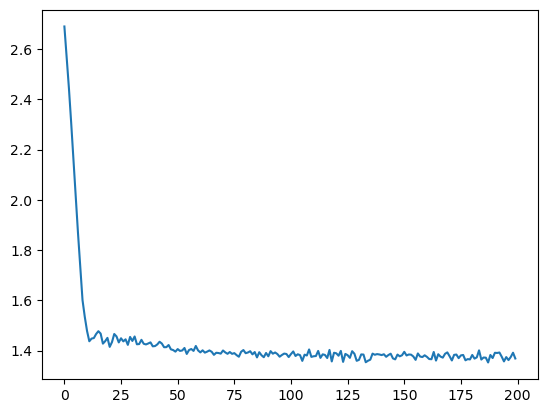

In [416]:
plt.plot(loss_)

In [417]:
pred_train_true = []
for d in train_dataset:
    pred_train_true.append(d.y.detach().numpy())
pred_train_true = np.concatenate(pred_train_true)
pred_train_true

array([0., 1., 0., ..., 0., 0., 0.], dtype=float32)

In [418]:
pred_test_true = []
for d in test_dataset:
    pred_test_true.append(d.y.detach().numpy())
pred_test_true = np.concatenate(pred_test_true)
pred_test_true

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

In [419]:
# Evaluation
model.eval()
# pred = model(data).argmax(dim=1)

predlist = []
for data in train_dataset:
    pred = model(data) #####################
    predlist.append(pred.detach().numpy())
pred_train = np.concatenate(predlist)
    
predlist = []
for data in test_dataset:
    pred = model(data) #####################
    predlist.append(pred.detach().numpy())
pred_test = np.concatenate(predlist)

# pred_save = pred.cpu().detach().numpy()
# np.savetxt('/data1/dhhyun/pred.csv', pred_save, delimiter=',', fmt='%d')

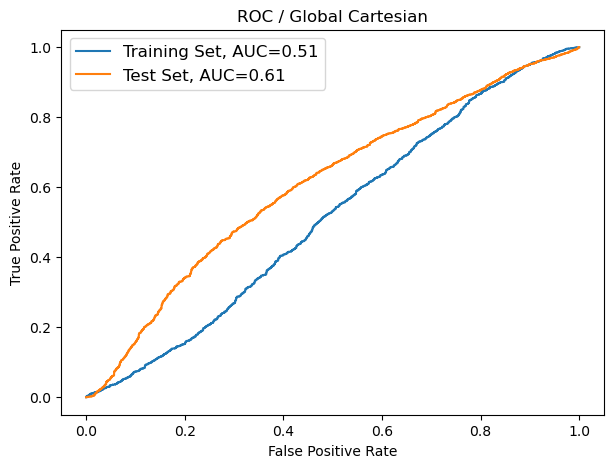

In [421]:
from sklearn.metrics import roc_curve, RocCurveDisplay, roc_auc_score

fpr1, tpr1, _ = roc_curve(pred_train_true, pred_train)
fpr2, tpr2, _ = roc_curve(pred_test_true, pred_test)

auc1 = roc_auc_score(pred_train_true, pred_train)
auc2 = roc_auc_score(pred_test_true, pred_test)

fig, ax = plt.subplots(figsize=(7,5))#dpi=150)
RocCurveDisplay(fpr=fpr1, tpr=tpr1).plot(ax=ax, label=f'Training Set, AUC={auc1:.2f}')
RocCurveDisplay(fpr=fpr2, tpr=tpr2).plot(ax=ax, label=f'Test Set, AUC={auc2:.2f}')

plt.title('ROC / Global Cartesian')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# ax.annotate(f'AUC (Training Set): {auc1:.2f}\nAUC (Test Set):      {auc2:.2f}', xy=(0.6,0.2), fontsize=12)
plt.legend(fontsize=12)
plt.show()

### On FIRE Snapshot

/data1/dhhyun/FireGnn_feedme.py contains the training/testing part of the code.

Also refer to GeoTest.ipynb, especially sections starting 'Weighted BCELoss'.

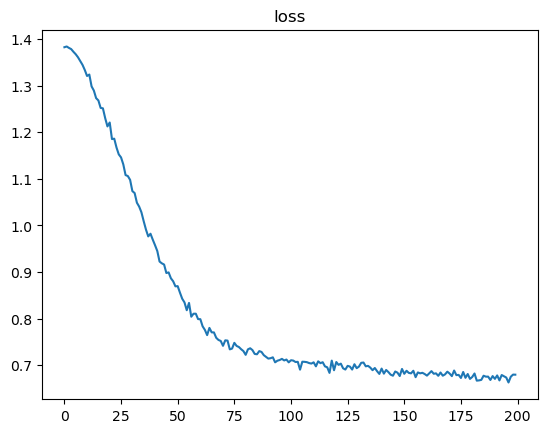

/tmp/ipykernel_446205/3934835839.py:21: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax.set_xticks([0.5],["0.5"])


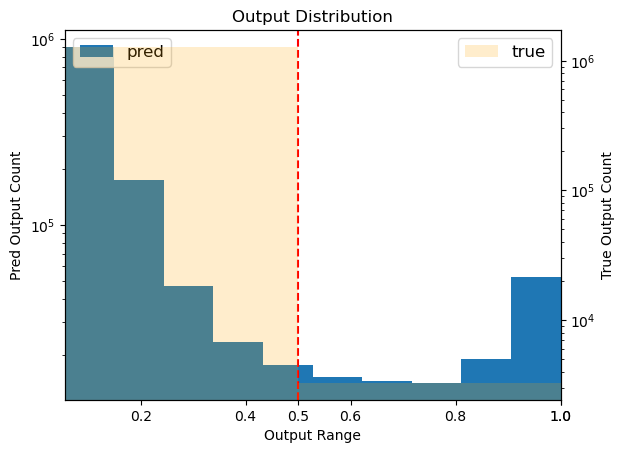

In [149]:
loss_ = np.loadtxt('/data1/dhhyun/loss.csv', delimiter=',')
plt.plot(loss_)
plt.title('loss')
plt.show()

train_mask = np.loadtxt('/data1/dhhyun/train_mask.csv', delimiter=',', dtype='int').astype('bool')
test_mask = ~train_mask
pred = np.loadtxt('/data1/dhhyun/pred.csv', delimiter=',', dtype='float')
pred_true = np.loadtxt('/data1/dhhyun/pred_true.csv', delimiter=',', dtype='int')

fig, ax = plt.subplots()
# ax.hist(pred, bins=np.logspace(np.log10(min(pred)), np.log10(max(pred)), 10), label='pred')
ax.hist(pred, label='pred')
ax.set_title('Output Distribution')
# ax.set_xscale('log')
ax.set_yscale('log')
ax.axvline(0.5, color='r', linestyle='--')#, label='0.5')
ax.legend(fontsize=12, loc='upper left')
new_ticks = sorted(np.append(ax.get_xticks(), [0.5, 1]))
ax.set_xticks(new_ticks)
ax.set_xticks([0.5],["0.5"])
# ax.set_xticklabels([str(tick) for tick in new_ticks])
# ax.set_xticklabels([0.5])
ax.set_xlim((min(pred),1))
ax.set_xlabel('Output Range')
ax.set_ylabel('Pred Output Count')

ax2 = ax.twinx()
ax2.hist(pred_true, bins=[0,0.5,1], color='orange', alpha=0.2, label='true')
ax2.set_yscale('log')
# ax2.set_ylim(0, 10**6.5)
ax2.legend(fontsize=12)
ax2.set_ylabel('True Output Count')

plt.show()

Text(0, 0.5, 'Count')

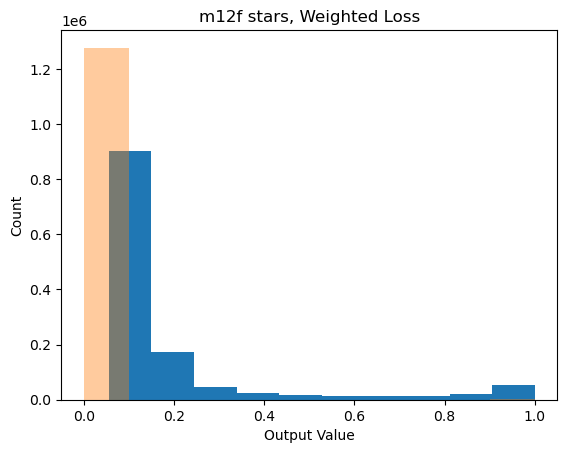

In [147]:
plt.hist(pred, label='Pred')
plt.hist(pred_true, alpha=0.4, label='True')
plt.title('m12f stars, Weighted Loss')
# plt.yscale('log')
plt.xlabel('Output Value')
plt.ylabel('Count')

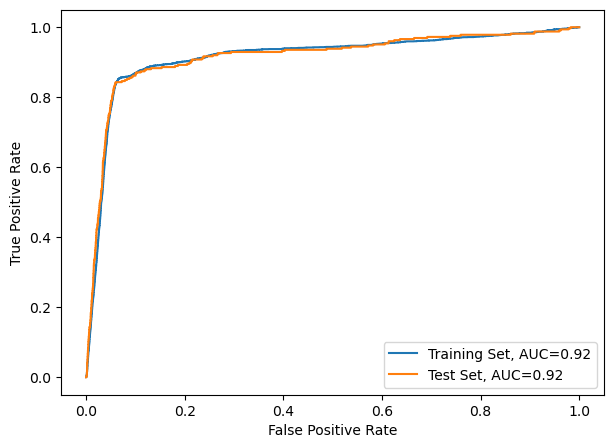

In [150]:
from sklearn.metrics import roc_curve, RocCurveDisplay, roc_auc_score

fpr1, tpr1, _ = roc_curve(pred_true[train_mask], pred[train_mask])
fpr2, tpr2, _ = roc_curve(pred_true[test_mask], pred[test_mask])

auc1 = roc_auc_score(pred_true[train_mask], pred[train_mask])
auc2 = roc_auc_score(pred_true[test_mask], pred[test_mask])

fig, ax = plt.subplots(figsize=(7,5))#dpi=150)
RocCurveDisplay(fpr=fpr1, tpr=tpr1).plot(ax=ax, label=f'Training Set, AUC={auc1:.2f}')
RocCurveDisplay(fpr=fpr2, tpr=tpr2).plot(ax=ax, label=f'Test Set, AUC={auc2:.2f}')

Saved as loss_391.csv and pred_391.csv

### On Ananke

#### Preprocessing

Please refer to ananke_test.ipynb for more details

In [33]:
def find_transformation(p, snap):
    # Step 1: Calculate centroids
    centroid_p = np.mean(p, axis=0)
    centroid_snap = np.mean(snap, axis=0)

    # Step 2: Translate points to have centroids at origin
    p_centered = p - centroid_p
    snap_centered = snap - centroid_snap

    # Step 3: Compute the optimal rotation matrix
    # Compute covariance matrix
    H = np.dot(p_centered.T, snap_centered)
    U, S, Vt = np.linalg.svd(H)
    R_optimal = np.dot(Vt.T, U.T)

    # Ensure a proper rotation matrix (handling reflection case)
    if np.linalg.det(R_optimal) < 0:
        Vt[-1, :] *= -1
        R_optimal = np.dot(Vt.T, U.T)

    # Step 4: Calculate the translation vector
    t = centroid_snap - np.dot(R_optimal, centroid_p)

    return R_optimal, t


##### m12f lsr0

In [231]:
# Load Ananke
# fname = 'lsr-0-rslice-0.m12f-res7100-md-sliced-gcat-dr2.hdf5'
fname = 'download.1'
f = h5py.File(f'/data1/dhhyun/Ananke/synthetic Gaia DR2 surveys/m12f/lsr_0/{fname}', 'r')

msk = np.array(f['partid']) == 0

px = np.array(f['px_true'])[msk]
py = np.array(f['py_true'])[msk]
pz = np.array(f['pz_true'])[msk]
parentid = np.array(f['parentid'])[msk] # index of star particles
p = np.array([px,py,pz]).T

f.close()


# Load Fire Snapshot
ds = yt.load('/data1/shared/FIRE2/m12f_res7100/snapdir_600/snapshot_600.0.hdf5')

snap_x = ds.r['PartType4','particle_position_x'].to('kpc')
snap_y = ds.r['PartType4','particle_position_y'].to('kpc')
snap_z = ds.r['PartType4','particle_position_z'].to('kpc')
snap = np.array([snap_x, snap_y, snap_z]).T
snap = snap[parentid]


R_matrix, t_vector = find_transformation(p[:100], snap[:100])
p_transformed = np.dot(p, R_matrix.T) + t_vector


yt : [INFO     ] 2023-12-11 17:41:37,182 Calculating time from 1.000e+00 to be 4.355e+17 seconds
yt : [INFO     ] 2023-12-11 17:41:37,185 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2023-12-11 17:41:37,201 Parameters: current_time              = 4.3545571088051386e+17 s
yt : [INFO     ] 2023-12-11 17:41:37,201 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2023-12-11 17:41:37,202 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2023-12-11 17:41:37,203 Parameters: domain_right_edge         = [60000. 60000. 60000.]
yt : [INFO     ] 2023-12-11 17:41:37,203 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2023-12-11 17:41:37,204 Parameters: current_redshift          = 0.0
yt : [INFO     ] 2023-12-11 17:41:37,204 Parameters: omega_lambda              = 0.728
yt : [INFO     ] 2023-12-11 17:41:37,205 Parameters: omega_matter              = 0.272
yt : [INFO     ] 2023-12-11 17:41:37,205 Parameters: omega_radiation           = 0.

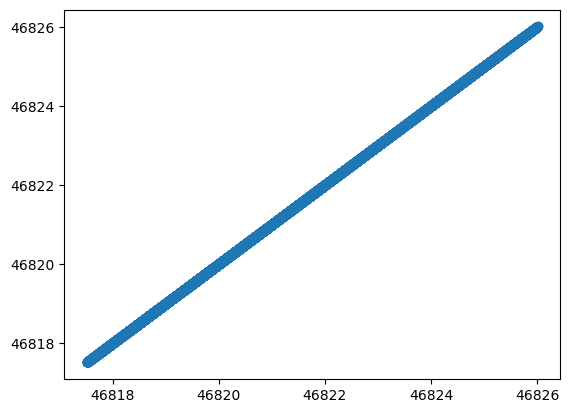

In [232]:
# plt.scatter(p_transformed[:,0], snap[:,0])
# plt.scatter(p_transformed[:,1], snap[:,1])
plt.scatter(p_transformed[:,2], snap[:,2])

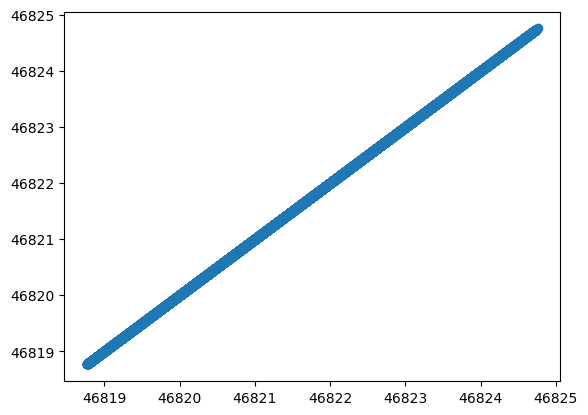

In [74]:
# plt.scatter(p_transformed[:,0], snap[:,0])
# plt.scatter(p_transformed[:,1], snap[:,1])
plt.scatter(p_transformed[:,2], snap[:,2])

In [233]:
R_matrix, t_vector

(array([[-7.08714942e-01, -4.64385968e-01,  5.31101501e-01],
        [ 4.43966938e-01,  2.91482979e-01,  8.47308109e-01],
        [-5.48285044e-01,  8.36291424e-01, -4.06326114e-04]]),
 array([38717.57259254, 47661.43112107, 46821.76070745]))

In [234]:
np.save('/data1/dhhyun/m12f_lsr0_Rmat', R_matrix)

In [235]:
np.save('/data1/dhhyun/m12f_lsr0_tvec', t_vector)

##### out_600 halo list

In [151]:
FireDmList = pd.read_csv('/data1/dhhyun/out_600.list', sep=' ', skiprows=range(1,16))
FireDmList

#ID  DescID       M200b  Vmax   Vrms  R200b     Rs   Np         X  \
0      42723      -1   3852700.0  3.78   4.28  3.935  0.064  213  27.11529   
1      42724      -1   3482300.0  3.72   4.03  3.804  0.080  149  27.07469   
2      42725      -1    716220.0  1.74   9.39  2.246  0.100   34  27.08519   
3      42726      -1   5779100.0  4.88   4.73  4.504  0.106  251  27.08336   
4      42727      -1   1531200.0  2.34   4.64  2.893  0.112   65  27.06883   
...      ...     ...         ...   ...    ...    ...    ...  ...       ...   
59080  42718      -1    271670.0  0.98  24.48  1.626  0.197  231  27.37032   
59081  42719      -1  18424000.0  7.46   6.75  6.629  0.008  803  27.34156   
59082  42720      -1   3457600.0  3.93   4.52  3.795  0.060  190  27.33009   
59083  42721      -1   1308900.0  2.11   7.97  2.746  0.126   68  27.33043   
59084  42722      -1   7754900.0  3.63   3.48  4.968  0.111  336  27.32780   

              Y  ...  A[z](500c)   T/|U|  M_pe_Behroozi  M_pe_Diemer  Type  \
0      33.20959  ...     0.20434  0.9121     10319000.0    2420300.0     0   
1      33.40471  ...    -0.20504  0.8469      9895300.0    2370900.0     0   
2      33.40739  ...     0.17243  1.1121      2997200.0     370460.0     0   
3      33.42049  ...    -0.11833  0.7581     19608000.0    4519600.0     0   
4      33.41262  ...    -0.21863  0.6623      2677500.0     765610.0     0   
...         ...  ...         ...     ...            ...          ...   ...   
59080  33.60855  ...     0.00000  2.5642       290220.0     172880.0     0   
59081  33.55047  ...     0.11877  0.6476     58486000.0   13979000.0     0   
59082  33.57051  ...    -0.09446  0.9361     13865000.0    2543800.0     0   
59083  33.58723  ...    -0.06343  0.7726      2905300.0     493940.0     0   
59084  33.59159  ...    -0.09516  0.6116      9482500.0    2963600.0     0   

        SM  Gas  BH_Mass  m200b_hires  m200b_lowres  
0      0.0  0.0      0.0    4050300.0           0.0  
1      0.0  0.0      0.0    3581100.0           0.0  
2      0.0  0.0      0.0     815000.0           0.0  
3      0.0  0.0      0.0    6075500.0           0.0  
4      0.0  0.0      0.0    1531200.0           0.0  
...    ...  ...      ...          ...           ...  
59080  0.0  0.0      0.0     345760.0           0.0  
59081  0.0  0.0      0.0   19116000.0           0.0  
59082  0.0  0.0      0.0    3729300.0           0.0  
59083  0.0  0.0      0.0    1432400.0           0.0  
59084  0.0  0.0      0.0    7804300.0           0.0  

[59085 rows x 46 columns]

In [623]:
x = FireDmList['X']*1e3/rockstar600.hubble_constant
y = FireDmList['Y']*1e3/rockstar600.hubble_constant
z = FireDmList['Z']*1e3/rockstar600.hubble_constant
m_halo = FireDmList['M200b']/rockstar600.hubble_constant # Mass unit Msun/h

# d_subhalo = {'m': rockstar600.r['halos', 'particle_mass'].to('Msun'), 'x': x - x0, 'y': y - y0, 'z': z - z0}
d_subhalo = {'m': m_halo, 'x': x, 'y': y, 'z': z}
df_halo = pd.DataFrame(data = d_subhalo)
df_halo

m             x             y             z
0      5.488176e+06  38625.768024  47307.106784  46823.858936
1      4.960541e+06  38567.933268  47585.055493  45277.633913
2      1.020256e+06  38582.890532  47588.873157  45280.340466
3      8.232336e+06  38580.283695  47607.534125  45295.568385
4      2.181197e+06  38559.585690  47596.323299  45323.032772
...             ...           ...           ...           ...
59080  3.869943e+05  38989.058611  47875.425855  46939.955798
59081  2.624501e+07  38948.089951  47792.690814  47005.838987
59082  4.925356e+06  38931.750920  47821.237822  46999.699386
59083  1.864530e+06  38932.235251  47845.055485  46986.465768
59084  1.104687e+07  38928.488812  47851.266311  47002.975739

[59085 rows x 4 columns]

In [625]:
idx_host = np.argmax(df_halo['m'])
idx_host

53425

In [636]:
cen_host = np.array([df_halo.loc[idx_host]['x'], df_halo.loc[idx_host]['y'], df_halo.loc[idx_host]['z']])
cen_host

array([38711.7794172 , 47665.05549073, 46817.30622947])

In [583]:
i = 4
pos_star = np.load(f'/data1/dhhyun/m12f_lsr0_{i}_pos.npy')

In [584]:
points = pos_star - cen_host.flatten()

dists = np.dot(points, normal)

projected_points = points - dists.reshape(-1,1) * np.tile(normal, (len(points), 1))

In [585]:
start_vec = normal
end_vec = np.array([0,0,1])

# Find rotation axis (perpendicular to both start and end vectors)
rotation_axis = np.cross(start_vec, end_vec)
rotation_axis = rotation_axis / np.linalg.norm(rotation_axis)

# Find rotation angle
angle = np.arccos(np.dot(start_vec, end_vec))

# Rodrigues' rotation formula
K = np.array([[0, -rotation_axis[2], rotation_axis[1]],
              [rotation_axis[2], 0, -rotation_axis[0]],
              [-rotation_axis[1], rotation_axis[0], 0]])
rotation_matrix = np.eye(3) + np.sin(angle) * K + (1 - np.cos(angle)) * np.dot(K, K)

rotated_points = np.dot(projected_points, rotation_matrix.T)

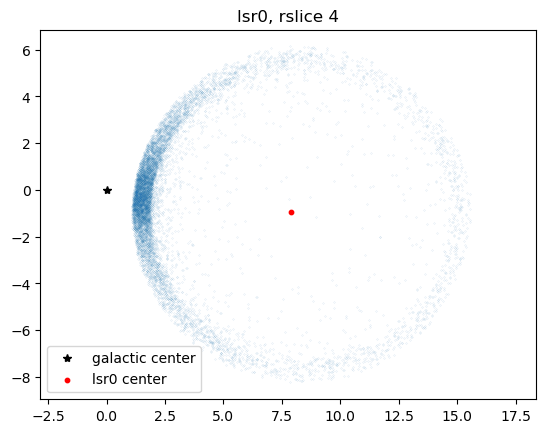

In [587]:
x = rotated_points[::int(len(rotated_points)/10000), 0]
y = rotated_points[::int(len(rotated_points)/10000), 1]
# x = np.random.choice(rotated_points[:,0], size=30000, replace=False)
# y = np.random.choice(rotated_points[:,1], size=30000, replace=False)
plt.scatter(x, y, s=0.01, alpha=.5)
plt.scatter(rotated_point[0][0], rotated_point[0][1], s=10, color='r', label='lsr0 center')
plt.plot(0,0, 'k*', label='galactic center')
plt.title('lsr0, rslice 4')
plt.axis('equal')
plt.legend();plt.show()

##### Exclude Disk Stars

In [645]:
R_matrix = np.load('/data1/dhhyun/m12f_lsr0_Rmat.npy')
t_vector = np.load('/data1/dhhyun/m12f_lsr0_tvec.npy')

In [648]:
start = time.time()

fname = 'download.8'
f = h5py.File(f'/data1/dhhyun/Ananke/synthetic Gaia DR2 surveys/m12f/lsr_0/{fname}', 'r')
px = np.array(f['px_true'])
py = np.array(f['py_true'])
pz = np.array(f['pz_true'])
b = np.array(f['b'])
r = 1/np.array(f['parallax_true']) # kpc

p = np.array([px,py,pz]).T
p_transformed = np.dot(p, R_matrix.T) + t_vector

f.close()

print(f'{(time.time()-start)/60:.4f} min')

23.1680 min


In [755]:
p_transformed

array([[38689.03127891, 47679.21658748, 46826.79207037],
       [38688.90515768, 47679.00037936, 46826.84660968],
       [38689.47096953, 47679.47372403, 46827.1731315 ],
       ...,
       [38664.36465679, 47611.16654098, 46847.97604854],
       [38655.32219975, 47610.82054428, 46849.37119066],
       [38657.48361869, 47612.66601931, 46837.45064679]])

(array([1.22239000e+06, 4.75048200e+06, 1.34994400e+07, 4.40208690e+07,
        2.20366654e+08, 2.20907537e+08, 4.10391870e+07, 1.25599550e+07,
        4.66031300e+06, 1.27063100e+06]),
 array([-8.99880839e+01, -7.19909139e+01, -5.39937438e+01, -3.59965738e+01,
        -1.79994038e+01, -2.23375594e-03,  1.79949363e+01,  3.59921063e+01,
         5.39892763e+01,  7.19864463e+01,  8.99836164e+01]),
 <BarContainer object of 10 artists>)

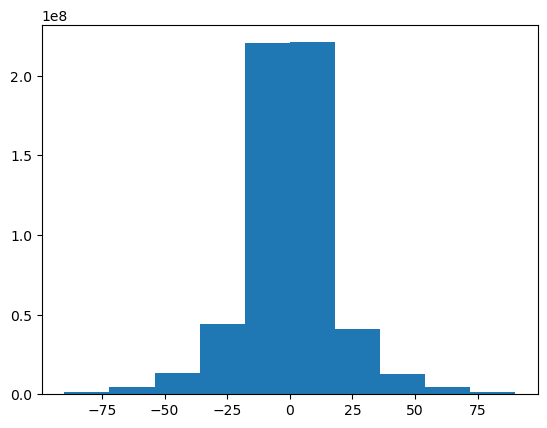

In [252]:
plt.hist(np.array(b))

(array([1.76103469e+08, 1.45891011e+08, 1.24393210e+08, 1.07689483e+08,
        9.37492210e+07, 8.22388850e+07, 7.17284450e+07, 6.38435990e+07,
        5.76771270e+07, 5.23247390e+07]),
 array([10.00000001, 10.5       , 11.        , 11.5       , 12.        ,
        12.5       , 13.        , 13.5       , 14.        , 14.49999999,
        14.99999999]),
 <BarContainer object of 10 artists>)

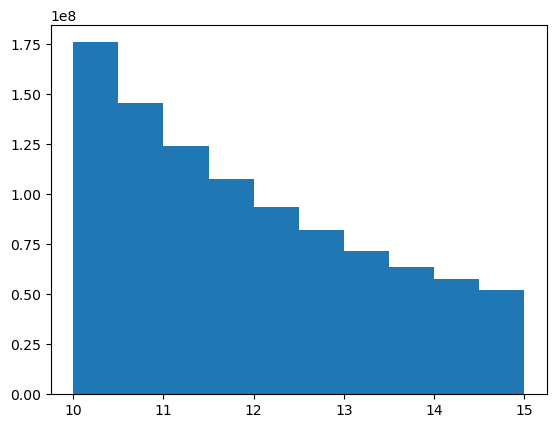

In [649]:
plt.hist(r)

In [253]:
np.min(b), np.max(b)

(-89.98808388261756, 89.98361637072925)

In [655]:
z = b*np.pi/180 * r# > 5 #kpc

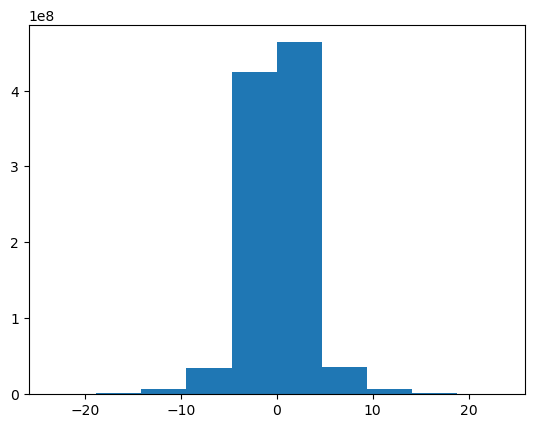

In [656]:
plt.hist(z)
plt.show()

In [658]:
nondisk = np.abs(z) > 5
nondisk

array([False, False, False, ..., False, False, False])

In [659]:
np.save('/data1/dhhyun/m12f_lsr0_rslice8_nondisk', nondisk)

In [662]:
nondisk.sum() / len(nondisk)

0.08010813923957702

In [665]:
rot_pts_nondisk = rotated_points[nondisk]

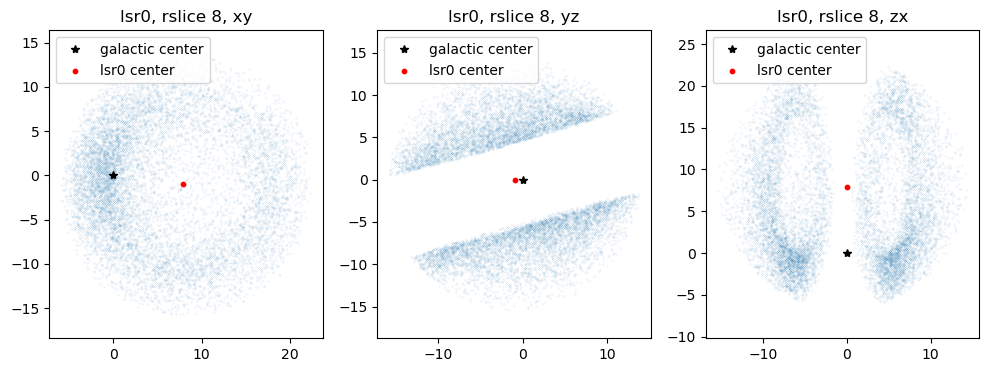

In [666]:
def proj_plot(rotated_points):
    x = rotated_points[::int(len(rotated_points)/10000), 0]
    y = rotated_points[::int(len(rotated_points)/10000), 1]
    z = rotated_points[::int(len(rotated_points)/10000), 2]
    # x = np.random.choice(rotated_points[:,0], size=30000, replace=False)
    # y = np.random.choice(rotated_points[:,1], size=30000, replace=False)
    axeslist = [x, y, z]
    axesname = ['xy', 'yz', 'zx']

    fig, axes = plt.subplots(1,3, figsize=(12, 4))
    for i, ax in enumerate(axes):
        ax.scatter(axeslist[i], axeslist[(i+1)%3], s=0.01, alpha=.5)
        ax.scatter(rotated_point[0][i], rotated_point[0][(i+1)%3], s=10, color='r', label='lsr0 center')
        ax.plot(0,0, 'k*', label='galactic center')
        ax.set_title(f'lsr0, rslice 8, {axesname[i]}')
        ax.axis('equal')
        ax.legend(loc=2)
    plt.show()

proj_plot(rot_pts_nondisk)

##### normal vector (check)

In [39]:
r, v, m = coord.to('Mpc'), vel.to('km/s'), m_star.to("Msun")
# r = r - cen_host.reshape(1,3) # yt array
r = r.to_value() - cen_host
l = m.reshape(len(m),1) * np.cross(r, v, axis=1)
J = np.sum(l, axis=0)
J

YTArray([-2.31338457e+11, -2.45045489e+11,  3.55797648e+10]) Msun

In [40]:
J/np.linalg.norm(J)

YTArray([-0.68268261, -0.72313223,  0.10499632]) Msun

In [721]:
np.save('/data1/dhhyun/m12f_lsr0_rslice8_dist', dists_subh)

In [722]:
np.save('/data1/dhhyun/m12f_lsr0_rslice8_idx', nearest)

#### GNN Result

##### Training on rslice8

In [100]:
loss = np.loadtxt('/data1/dhhyun/ananke_gnn_test/loss_3.csv')
loss2 = np.loadtxt('/data1/dhhyun/ananke_gnn_test/loss2_3.csv')

In [103]:
train_mask = np.loadtxt('/data1/dhhyun/ananke_gnn_test2/train_mask.csv', dtype=int)

In [124]:
pred = np.loadtxt('/data1/dhhyun/ananke_gnn_test/pred_1.csv')
pred_true = np.loadtxt('/data1/dhhyun/ananke_gnn_test/pred_true_1.csv')

In [108]:
eval_mask = np.loadtxt('/data1/dhhyun/ananke_gnn_test/eval_mask_1.csv', dtype='int').astype('bool')

/tmp/ipykernel_245220/3879997095.py:1: DeprecationWarning: loadtxt(): Parsing an integer via a float is deprecated.  To avoid this warning, you can:
    * make sure the original data is stored as integers.
    * use the `converters=` keyword argument.  If you only use
      NumPy 1.23 or later, `converters=float` will normally work.
    * Use `np.loadtxt(...).astype(np.int64)` parsing the file as
      floating point and then convert it.  (On all NumPy versions.)
  (Deprecated NumPy 1.23)
  eval_mask = np.loadtxt('/data1/dhhyun/ananke_gnn_test/eval_mask_1.csv', dtype='int').astype('bool')


In [106]:
np.shape(pred), np.shape(pred_true), np.shape(eval_mask)

((879640536,), (879640536,), (879640536,))

In [109]:
eval_mask[:4]

array([False, False, False, False])

In [110]:
pred_train = pred[~eval_mask] # eval_mask is True for the Test set
pred_train_true = pred_true[~eval_mask]
pred_test = pred[eval_mask] # eval_mask is True for the Test set
pred_test_true = pred_true[eval_mask]

/tmp/ipykernel_245220/902106500.py:11: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax.set_xticks([0.5],["0.5"])


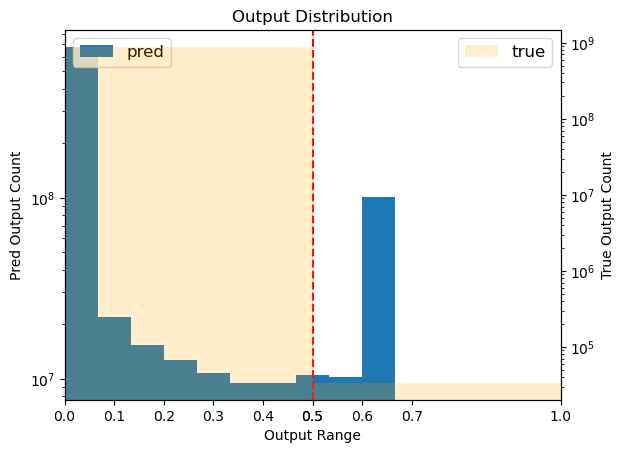

In [111]:
fig, ax = plt.subplots()
# ax.hist(pred, bins=np.logspace(np.log10(min(pred)), np.log10(max(pred)), 10), label='pred')
ax.hist(pred, label='pred')
ax.set_title('Output Distribution')
# ax.set_xscale('log')
ax.set_yscale('log')
ax.axvline(0.5, color='r', linestyle='--')#, label='0.5')
ax.legend(fontsize=12, loc='upper left')
new_ticks = sorted(np.append(ax.get_xticks(), [0.5, 1]))
ax.set_xticks(new_ticks)
ax.set_xticks([0.5],["0.5"])
# ax.set_xticklabels([str(tick) for tick in new_ticks])
# ax.set_xticklabels([0.5])
ax.set_xlim((min(pred),1))
ax.set_xlabel('Output Range')
ax.set_ylabel('Pred Output Count')

ax2 = ax.twinx()
ax2.hist(pred_true, bins=[0,0.5,1], color='orange', alpha=0.2, label='true')
ax2.set_yscale('log')
# ax2.set_ylim(0, 10**6.5)
ax2.legend(fontsize=12)
ax2.set_ylabel('True Output Count')

plt.show()

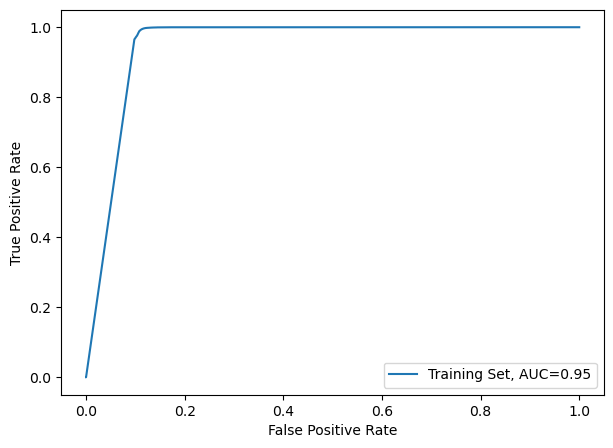

In [116]:
from sklearn.metrics import roc_curve, RocCurveDisplay, roc_auc_score

fpr1, tpr1, _ = roc_curve(pred_true, pred)
# fpr2, tpr2, _ = roc_curve(pred_test_true, pred_test)

auc1 = roc_auc_score(pred_true, pred)
# auc2 = roc_auc_score(pred_test_true, pred_test)

fig, ax = plt.subplots(figsize=(7,5))#dpi=150)
RocCurveDisplay(fpr=fpr1, tpr=tpr1).plot(ax=ax, label=f'Training Set, AUC={auc1:.2f}')
# RocCurveDisplay(fpr=fpr2, tpr=tpr2).plot(ax=ax, label=f'Test Set, AUC={auc2:.2f}')

##### test on rslice9

In [117]:
pred = np.loadtxt('/data1/dhhyun/ananke_gnn_test3/pred_1.csv')
pred_true = np.loadtxt('/data1/dhhyun/ananke_gnn_test3/pred_true_1.csv')
eval_mask = np.loadtxt('/data1/dhhyun/ananke_gnn_test3/eval_mask_1.csv', dtype='int').astype('bool')

In [119]:
eval_mask.sum(), (~eval_mask).sum()

(470859755, 0)

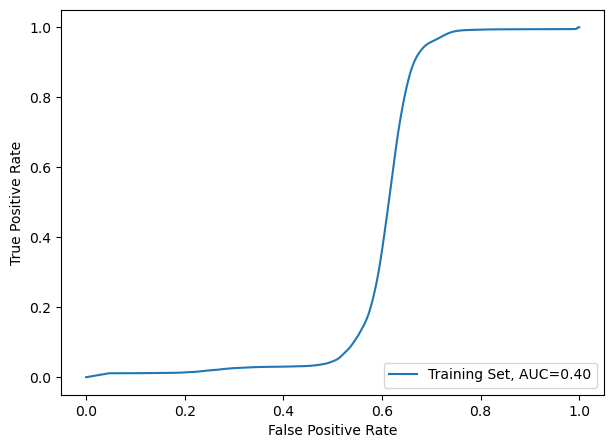

In [120]:
from sklearn.metrics import roc_curve, RocCurveDisplay, roc_auc_score

fpr1, tpr1, _ = roc_curve(pred_true, pred)
auc1 = roc_auc_score(pred_true, pred)

fig, ax = plt.subplots(figsize=(7,5))#dpi=150)
RocCurveDisplay(fpr=fpr1, tpr=tpr1).plot(ax=ax, label=f'Training Set, AUC={auc1:.2f}')

In [121]:
len(pred)

470859755

In [123]:
len(pred_true)/pred_true.sum()

3092.8171081757455